# Exploratory Data Analysis on Anime Dataset

Information gathered from [My Anime List](https://myanimelist.net/)

Usually when we think of Data Science, Machine Learning or Artificial Intelligence, we think of the models and the wonderful applications, but the first step is usually to explore and clean the data.

The topics covered in the post is as follows:

- Data Preparation, Cleaning and Descriptive Analysis
- Data and Visual Analysis
- References

# Data Preparation, Cleaning and Descriptive Analysis

## Importing libraries and checking the raw information

In [39]:
#Library imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import sys
import seaborn as sns
from collections import Counter
from utils import utils
from scipy.stats import chi2_contingency
from sklearn.linear_model import LinearRegression
import warnings
import pickle
warnings.simplefilter(action='ignore', category=FutureWarning)

First we need to read the csv file that contains the data

In [38]:
#Preparing folder variables
os.chdir(os.path.dirname(sys.path[0])) # This command makes the notebook the main path and can work in cascade.
main_folder = sys.path[0]
data_folder = (main_folder + "\data")
img_folder = (main_folder + "\images")
#df = pd.read_csv(data_folder + "/" + "anime_2022_12_02_00_24_58.csv",sep=";")

In [29]:
#df_copy = df.copy() # making  copy
#df_copy.sample(5) # printing a sample

,Cover,English_Title,Japanses_Title,Type,Source,Audience,N_Episodes,Duration,Rating,Score,Scored_by,Rank,Season,Genre,Theme,Released,Studios,Producers
14527,https://cdn.myanimelist.net/images/anime/1690/...,Märchen Mädchen Specials,メルヘン・メドヘン,Special,Light novel,[],2,23 min per ep,PG-13 - Teens 13 or older,6.02,2405.0,9173.0,NaN,['Fantasy'],"['Isekai', 'School']",2019.0,['Hoods Entertainment'],[]
5747,https://cdn.myanimelist.net/images/anime/13/26...,Renshenguo,人參果,Movie,Unknown,['Kids'],1,44 min,G - All Ages,6.24,124.0,8002.0,NaN,[],[],1981.0,['Shanghai Animation Film Studio'],[]
1659,https://cdn.myanimelist.net/images/anime/10/49...,Shin Hakkenden,神八剣伝,TV,Unknown,[],26,24 min per ep,PG-13 - Teens 13 or older,7.17,2181.0,3217.0,spring,"['Action', 'Adventure', 'Sci-Fi']",['Martial Arts'],1999.0,['Public & Basic'],['TV Tokyo']
23888,https://cdn.myanimelist.net/images/anime/1967/...,Shenzu,圣祖,ONA,Web novel,[],26,Unknown,PG-13 - Teens 13 or older,NaN,NaN,NaN,NaN,"['Action', 'Adventure', 'Fantasy']","['Historical', 'Martial Arts']",NaN,[],[]
7569,https://cdn.myanimelist.net/images/anime/7/457...,Wala! Pyeon-uijeom The Animation,와라! 편의점 the animation,TV,Web manga,[],24,24 min per ep,G - All Ages,NaN,NaN,17043.0,fall,['Slice of Life'],[],2009.0,[],[]


Now lets count of non-null values and the format of the columns

In [7]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24105 entries, 0 to 24104
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Cover           24105 non-null  object 
 1   English_Title   24105 non-null  object 
 2   Japanses_Title  23914 non-null  object 
 3   Type            24029 non-null  object 
 4   Source          24105 non-null  object 
 5   Audience        24105 non-null  object 
 6   N_Episodes      24105 non-null  int64  
 7   Duration        24105 non-null  object 
 8   Rating          23315 non-null  object 
 9   Score           14874 non-null  float64
 10  Scored_by       14874 non-null  float64
 11  Rank            21515 non-null  float64
 12  Season          5348 non-null   object 
 13  Genre           24105 non-null  object 
 14  Theme           24105 non-null  object 
 15  Released        22885 non-null  float64
 16  Studios         24105 non-null  object 
 17  Producers       24105 non-null 

Printing the number of null values per column

In [8]:
#Print number of null per column
df_copy.isna().sum()

Cover                 0
English_Title         0
Japanses_Title      191
Type                 76
Source                0
Audience              0
N_Episodes            0
Duration              0
Rating              790
Score              9231
Scored_by          9231
Rank               2590
Season            18757
Genre                 0
Theme                 0
Released           1220
Studios               0
Producers             0
dtype: int64

Let's see the total number of null values in the df

In [9]:
#Print number TOTAL of null values in the df
df_copy.isna().sum().sum()

42086

Checking the percenteage of null values from higher to lower

In [10]:
((df_copy.isnull().sum() / len(df_copy))*100).sort_values(ascending = False)

Season            77.813732
Score             38.294960
Scored_by         38.294960
Rank              10.744659
Released           5.061191
Rating             3.277328
Japanses_Title     0.792367
Type               0.315287
Studios            0.000000
Theme              0.000000
Genre              0.000000
Cover              0.000000
English_Title      0.000000
Duration           0.000000
N_Episodes         0.000000
Audience           0.000000
Source             0.000000
Producers          0.000000
dtype: float64

## Next esteps explanation 

So far now we can see that we can't be completely confident in these results as we can see in the dataframe that there are many columns with empty lists. First we will have to clean the data, compare it with the previous results to see the change and then we can proceed to analyze.

There are some columns that the information is storaged inside a list and we would like to display them by removing brackets and commas from the list. in this way we can later analyze it if needed.

Now we can fully see the work we need to do.
- We will remove the column Season due to the high number of missing values.

- In Audience, rating ,Genre, Theme, Studios and Producers we will proceed to change null values to Unknown, due to we do not have that information.

- About released, Scored_by, Score and Rank:
    - Released: We will find the missing values with interpolation

    - Scored_by: We will find the missing values with interpolation
    
    - Score: We will find the missing values with interpolation

    - Rank: once we have all the values in Scored_by and Score we will use linear regresion to predict the missing values.

- Cover ,English_Title and Japanses_Title are not needed, we can also remove this columns

- Audience column: In the case of Audience, it is basically the japanese way to classify the people that would watch the anime. From My Anime List a different way of classification (more international style) was created to be more understandable for non japanese. For this reason we are not going to use Audience and we are going to drop it. 

- Duration column. We are gonna standarize is converting the information into a numeric value representing minutes.

## Cleaning the columns with empty lists

In [11]:
non_numeric = ["Audience","Genre","Theme","Studios","Producers"]
for column in non_numeric:
    df_copy[column] = df_copy[column].apply(eval).str.join(',') #remove brackets and commas

df_copy.sample(5)

,Cover,English_Title,Japanses_Title,Type,Source,Audience,N_Episodes,Duration,Rating,Score,Scored_by,Rank,Season,Genre,Theme,Released,Studios,Producers
9798,https://cdn.myanimelist.net/images/anime/12/73...,Punch Line,パンチライン,TV,Original,,12,23 min per ep,PG-13 - Teens 13 or older,6.92,91063.0,4327.0,spring,"Comedy,Sci-Fi,Supernatural,Ecchi",Super Power,2015.0,MAPPA,"Aniplex,Dentsu,Fuji TV,MAGES.,Kyoraku Industri..."
20225,https://cdn.myanimelist.net/images/anime/1275/...,Bai Bian Bu Lu Ke 4th Season,百变布鲁可 第4季,TV,Original,Kids,20,11 min per ep,PG - Children,NaN,NaN,18577.0,NaN,Fantasy,,NaN,,
21173,https://cdn.myanimelist.net/images/anime/1951/...,Dahuoji Yu Gongzhu Qun,打火机与公主裙,ONA,Novel,,13,14 min per ep,PG-13 - Teens 13 or older,6.55,165.0,6209.0,NaN,"Drama,Romance",School,2021.0,2:10 AM Animation,
8520,https://cdn.myanimelist.net/images/anime/7/786...,Airy Me,Airy Me,Music,Music,,1,5 min,PG-13 - Teens 13 or older,6.31,2583.0,7593.0,NaN,"Avant Garde,Award Winning,Drama,Horror",Music,2013.0,,Tamabi
4803,https://cdn.myanimelist.net/images/anime/5/160...,Mikan-Seijin,ミカンせいじん,TV,Unknown,,26,22 sec per ep,G - All Ages,5.59,208.0,11064.0,NaN,Comedy,,1992.0,,


After doiung that, we can see that in the columns "Audience","Genre","Theme","Studios" and "Producers" there are many empty spaces. For the purpose of checking missing data, we will replace them with NaN. However, later we will replace them with "Unknown"

In [12]:
# Replacing empty space with NaN
list_not_num = ["Audience","Genre","Theme","Studios","Producers"]
df_copy[list_not_num] = df_copy[list_not_num].apply(lambda x: x.str.strip() if isinstance(x, str) else x).replace('', np.nan)

Let's check again the percenteage of null values.

In [13]:
((df_copy.isnull().sum() / len(df_copy))*100).sort_values(ascending = False)

Season            77.813732
Audience          60.912674
Producers         53.839452
Theme             46.081726
Studios           43.410081
Scored_by         38.294960
Score             38.294960
Genre             19.207633
Rank              10.744659
Released           5.061191
Rating             3.277328
Japanses_Title     0.792367
Type               0.315287
Duration           0.000000
English_Title      0.000000
N_Episodes         0.000000
Source             0.000000
Cover              0.000000
dtype: float64

## About released, Scored_by, Score and Rank

It is time to deal with the cleaning of Score, Scored_by and Rank values

lets check the number of null values in each of those columns

In [14]:
list_num = ["Rank",'Score','Scored_by',"Released"]
for cat in list_num:
    null_num = df_copy[cat].isna().sum()
    number = df_copy[cat][df_copy[cat] == 0].count()
    print("In the column ndamed",cat,"there are:",number,"of zero values")
    print("In the column ndamed",cat,"there are:",null_num,"of null values")

In the column ndamed Rank there are: 0 of zero values
In the column ndamed Rank there are: 2590 of null values
In the column ndamed Score there are: 0 of zero values
In the column ndamed Score there are: 9231 of null values
In the column ndamed Scored_by there are: 0 of zero values
In the column ndamed Scored_by there are: 9231 of null values
In the column ndamed Released there are: 0 of zero values
In the column ndamed Released there are: 1220 of null values


First we replace teh NaN values to zeros and count how many of them we have. We have 2590 rows with zero values.

In [15]:
#Replacing nan with ZEROS in numerical columns
list_num = ["Rank"]
for cat in list_num:
    df_copy[list_num] = df_copy[list_num].fillna(0)

Now we proceed with the interpolation to replace the missing null values in Released, Score and Scored_by

In [16]:
df_copy['Released'] = df_copy['Released'].interpolate(method = "spline", order = 1,  limit_direction = "both", downcast = "infer")
df_copy['Score'] = df_copy['Score'].interpolate(method = "spline", order = 3,  limit_direction = "both", downcast = "infer")
df_copy['Scored_by'] = df_copy['Scored_by'].interpolate(method = "spline", order = 3,  limit_direction = "both", downcast = "infer")

It is possible that during the interpolation in scored_by, we suddenly get negative number, so we are going to check the min of Scored_by and in case we have we will convert the Scored_by column to absolute value using abs from numpy

In [ ]:
df_copy['Scored_by'].agg(['min', 'max'])

In [ ]:
df_copy['Scored_by'] = np.abs(df_copy['Scored_by']) # convert the Scored_by column to absolute value using abs from numpy

Now let's launch the prediction function to replace the zero values in the rank column. We also check how many zero and null values we have now, we can see that we do not have now.

In [17]:
utils.predict(df_copy)

In [18]:
list_num = ["Rank",'Score','Scored_by',"Released"]
for cat in list_num:
    null_num = df_copy[cat].isna().sum()
    number = df_copy[cat][df_copy[cat] == 0].count()
    print("In the column ndamed",cat,"there are:",number,"of zero values")
    print("In the column ndamed",cat,"there are:",null_num,"of null values")

In the column ndamed Rank there are: 0 of zero values
In the column ndamed Rank there are: 0 of null values
In the column ndamed Score there are: 0 of zero values
In the column ndamed Score there are: 0 of null values
In the column ndamed Scored_by there are: 0 of zero values
In the column ndamed Scored_by there are: 0 of null values
In the column ndamed Released there are: 0 of zero values
In the column ndamed Released there are: 0 of null values


To finalize with Scored_by, Rank and Released columns, we will chenge the column type to integer.

In [42]:
df_copy[['Scored_by','Rank','Released']] = df_copy[['Scored_by','Rank','Released']].astype('int') # change the type of the column to integer

## Dealing with Audience and Rating columns

As mentioned before, Audience column is basically the japanese way to classify the people that would watch the anime. From My Anime List a different way of classification (more international style) was created to be more understandable for non japanese.

We can print both columns to see how they are classified:

In [20]:
df_copy['Audience'].str.split(',').explode().value_counts()

Kids       5785
Shounen    2035
Seinen      915
Shoujo      700
Josei       105
Name: Audience, dtype: int64

In [21]:
df_copy['Rating'].str.split(',').explode().value_counts()

PG-13 - Teens 13 or older         8192
G - All Ages                      7230
PG - Children                     3989
Rx - Hentai                       1455
R - 17+ (violence & profanity)    1376
R+ - Mild Nudity                  1073
Name: Rating, dtype: int64

In [22]:
df_copy.drop(["Audience"] , axis = 1 , inplace = True)

## Removing unncesary columns

So let's proceed dropping the unnecesary columns for this analysis

In [23]:
# Dorpping unncesseray columns
df_copy.drop(["Cover" ,"Japanses_Title","Season",] , axis = 1 , inplace = True)

## Change null values to Unknown

We should not forget to assign Unkowns to all the Nan in the CATEGORICAL VARIABLES columns

In [24]:
list_num = ["Type",'Rating','Genre',"Released",'Studios',"Producers","Theme"]
for cat in list_num:
    df_copy[cat] = df_copy[cat].fillna('Unknown')

## Standaricing duration column

To finalize, lets change the format in the duration column. Let's leave the columns just with the duration in minutes

In [25]:
utils.to_minutes(df_copy)

Now are going to convert the Unknown values to nand in order to be able to interpolate the missing information

In [26]:
df_copy['Duration'] = df_copy['Duration'].replace('Unknown', np.nan)
df_copy['Duration'] = df_copy['Duration'].interpolate(method = "spline", order = 1,  limit_direction = "both", downcast = "infer")

In [44]:
df_copy[['Duration']] = df_copy[['Duration']].astype('int') # change the type of the column to integer

## Checking results after the cleaning process

Finally, lets check the result of this cleaning process. As result, we see no null values in the columns and everything looks clean.

In [27]:
print(((df_copy.isnull().sum() / len(df_copy))*100).sort_values(ascending = False))
print(f"Total number of records: {len(df_copy)}")

English_Title    0.0
Type             0.0
Source           0.0
N_Episodes       0.0
Duration         0.0
Rating           0.0
Score            0.0
Scored_by        0.0
Rank             0.0
Genre            0.0
Theme            0.0
Released         0.0
Studios          0.0
Producers        0.0
dtype: float64
Total number of records: 24105


In [49]:
df_copy.sample(5) # printing a sample

,English_Title,Type,Source,N_Episodes,Duration,Rating,Score,Scored_by,Rank,Genre,Theme,Released,Studios,Producers
15697,Di Ling Qu,ONA,Unknown,18,20,PG-13 - Teens 13 or older,6.444233,-133454,19447,Unknown,Unknown,2017,Unknown,Unknown
23513,"Never Lose, My Rule",Music,Game,1,2,PG-13 - Teens 13 or older,6.612470,273,14568,Action,"Idols (Male),Music",2022,Flat Studio,Unknown
14362,Daisuki na Mama,OVA,Web manga,2,16,Rx - Hentai,6.570000,5503,10281,Hentai,Unknown,2018,T-Rex,Lune Pictures
10944,Larva,TV,Original,104,2,G - All Ages,5.900000,1157,9757,Comedy,Unknown,2011,TUBA,Unknown
17317,Aku no Onna Kanbu: Full Moon Night R,OVA,Visual novel,2,16,Rx - Hentai,6.770000,2422,9466,Hentai,Unknown,2020,T-Rex,Lune Pictures


There are 18 columns and 24105 rows

In [50]:
#To find out the number of columns and rows
df_copy.shape

(24105, 14)

Let's have a look at the descriptive stats of the records.

In [81]:
df_copy.describe(include = "all")

,English_Title,Type,Source,N_Episodes,Duration,Rating,Score,Scored_by,Rank,Genre,Theme,Released,Studios,Producers
count,24105,24105,24105,24105.000000,24105.000000,24105,24105.000000,2.410500e+04,24105.000000,24105,24105,24105.000000,24105,24105
unique,24050,7,17,NaN,NaN,7,NaN,NaN,NaN,1008,800,NaN,1437,4237
top,Genshin Impact,TV,Original,NaN,NaN,PG-13 - Teens 13 or older,NaN,NaN,NaN,Unknown,Unknown,NaN,Unknown,Unknown
freq,6,7509,8920,NaN,NaN,8192,NaN,NaN,NaN,4630,11108,NaN,10464,12978
mean,NaN,NaN,NaN,14.895623,22.302095,NaN,6.453147,5.810970e+04,10806.178926,NaN,NaN,2007.544368,NaN,NaN
std,NaN,NaN,NaN,49.937253,26.339379,NaN,0.718209,2.356684e+05,5917.121095,NaN,NaN,14.557824,NaN,NaN
min,NaN,NaN,NaN,0.000000,0.000000,NaN,1.850000,0.000000e+00,1.000000,NaN,NaN,1917.000000,NaN,NaN
25%,NaN,NaN,NaN,1.000000,5.000000,NaN,6.210000,6.740000e+02,6004.000000,NaN,NaN,2002.000000,NaN,NaN
50%,NaN,NaN,NaN,2.000000,17.000000,NaN,6.530696,3.897000e+03,10569.000000,NaN,NaN,2012.000000,NaN,NaN
75%,NaN,NaN,NaN,13.000000,25.000000,NaN,6.650000,2.706400e+04,15657.000000,NaN,NaN,2017.000000,NaN,NaN


In [55]:
# Get count of values greater than 2022 in the column 'Released' 
count = df_copy["Released"][df_copy["Released"] > 2022].count()
print("There are",count,"animes after 2023 for future releases")

There are 206 animes after 2023 for future releases


Let's take a look at some part of the information:

- Type:There are 7 different categories and the top on is TV.

- Source: There are 17 different cartegories and the top one is Original.

- N_Episodes: The average number os episodes is 15 episodes.

- Duration: The usual duration of an episode is 24 minutes.

- Rating: There are 7 different ratings, adn the most common es PG-13 - Teens 13 or older.

- Released: There are 206 animes after 2023 for future releases. Becase this number is so low we will not allocate them to a different year.

- Score: The mean rating of all the anime is around 6.5 

For categorical variables, measures like mean, std, quartiles does not make sense, hence those positions are filled using NaN above and for continuous variables, measures like unique, top and frequency don’t make much sense hence those positions are filled using NaN values as well for those respective places.

In [32]:
# Checking possible correlations for future studies.
corr = df_copy.corr ()
corr.style.background_gradient (cmap = 'coolwarm')

,N_Episodes,Duration,Score,Scored_by,Rank,Released
N_Episodes,1.000000,-0.081955,0.069993,0.047300,0.049789,-0.019330
Duration,-0.081955,1.000000,0.211447,0.001489,-0.218661,-0.124512
Score,0.069993,0.211447,1.000000,0.141265,-0.484039,0.220831
Scored_by,0.047300,0.001489,0.141265,1.000000,-0.011985,0.057732
Rank,0.049789,-0.218661,-0.484039,-0.011985,1.000000,-0.085893
Released,-0.019330,-0.124512,0.220831,0.057732,-0.085893,1.000000


## Saving cleaned df using Pickle

In [78]:
# fichero = open(data_folder + "/" +"anime.pkl","wb")
# pickle.dump(df_copy,fichero)
# fichero.close()

## Opening cleaned df using Pickle

In [79]:
fichero = open(data_folder + "/" +"anime.pkl","rb")
df_copy = pickle.load(fichero)
fichero.close()

# Data and visual Analysis  

## One Dimensional-Analysis

### Numerical Columns

#### N_Episodes

75 % of the animes has 13 episodes. This is actually the standard number of episodes for an anime.

In [3]:
df_copy["N_Episodes"].describe()

count    24105.000000
mean        14.895623
std         49.937253
min          0.000000
25%          1.000000
50%          2.000000
75%         13.000000
max       3057.000000
Name: N_Episodes, dtype: float64

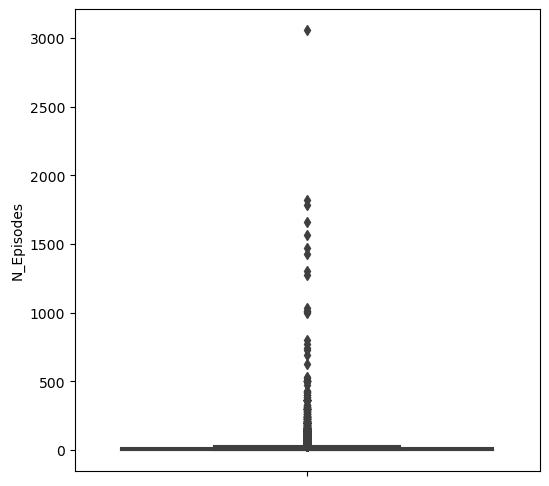

In [4]:
utils.box(df_copy,'N_Episodes') # Hacer una escala logaricmica  numpy loc de n_pisodios+1 

#### Duration

At first it is pretty hard to see using a regular histplot, for this reason we are going to use a logarithmic scale.

Now we can see that the distribution tells us that most of the animes has a duration between 5 and 25 minutes.

Another way is to not take into account duration higer than 150minutes because they are unusual

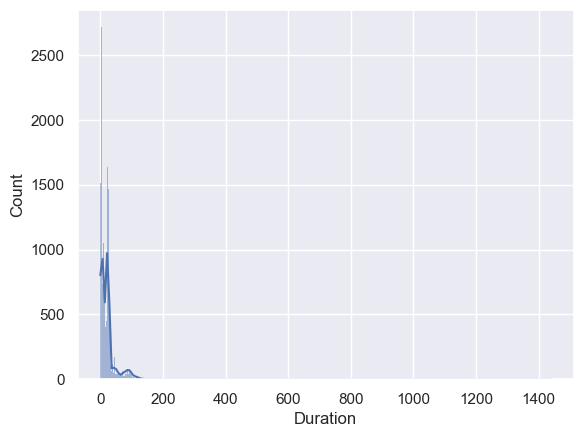

In [27]:
sns.histplot(data = df_copy , x = 'Duration' , kde = True, palette="light:m_r")
plt.savefig(f"./images/histplot_Duration.png") # Saving the image to the images folder

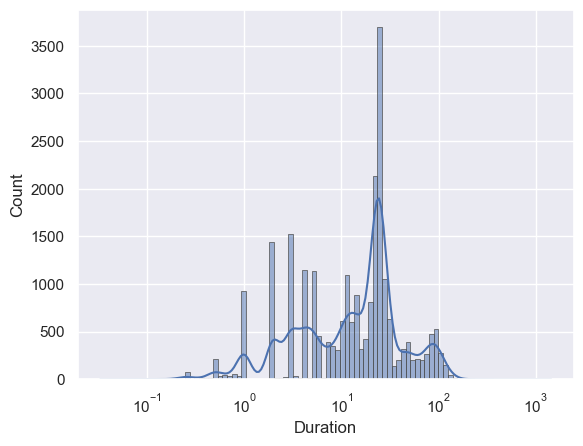

In [28]:
sns.histplot(data = df_copy , x = 'Duration', kde = True, palette="light:m_r", log_scale=True, edgecolor=".3", linewidth=.5)
plt.savefig(f"./images/histplot_log_scale_Duration.png") # Saving the image to the images folder

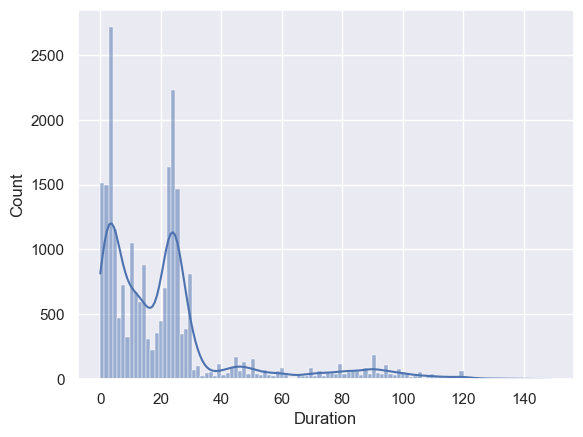

In [29]:
until400 = df_copy[df_copy["Duration"] < 150] 
sns.histplot(data = until400 , x = 'Duration' , kde = True, palette="light:m_r")
plt.savefig(f"./images/histplot_Duration_less_150.png") # Saving the image to the images folder

#### Score

Most of the animes are rated between 5 to 8

In [8]:
print("There are",len(df_copy[(df_copy['Score'] >= 5) & (df_copy['Score'] <= 6)]),"animes between 5 and 6 points")
print("There are",len(df_copy[df_copy['Score'].between(6,7)]),"animes between 6 and 7 points")
print("There are",len(df_copy[df_copy['Score'].between(7,8)]),"animes between 7 and 8 points")
print("There are",len(df_copy[(df_copy['Score'] >= 8) & (df_copy['Score'] <= 9)]),"animes between 8 and 9 points")

There are 3938 animes between 5 and 6 points
There are 15301 animes between 6 and 7 points
There are 3602 animes between 7 and 8 points
There are 579 animes between 8 and 9 points


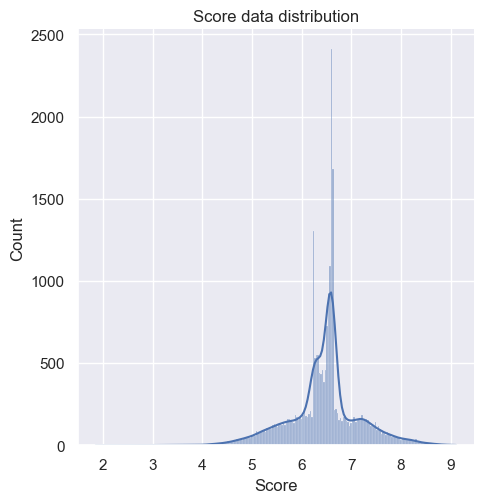

In [26]:
sns.displot(data = df_copy , x = 'Score' , kde = True, height=5,aspect=1).set(title='Score data distribution')
plt.savefig(f"./images/displot_Score.png") # Saving the image to the images folder

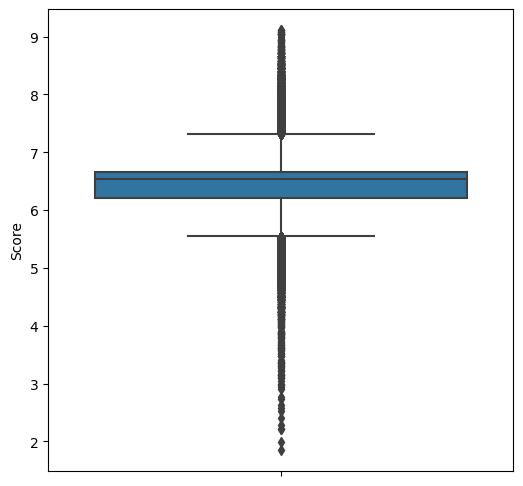

In [10]:
utils.box(df_copy,'Score')

#### Rank

#### Released

We can see a serious increase the 80's. At that time, anime became mainstream in Japan, experiencing a boom in production with the rise in popularity of anime like Gundam, Macross, Dragon Ball, and genres such as real robot, space opera and cyberpunk.

We can appreciate a declive in releases during 2019 and 2020, this could be duo to the COVID-19 period.

Another possible factor is that during the last years in the anime industry, there are so many copy-and-paste anime. The only difference may be the relationship between characters, slight changes in the plot, and different characters and/or setting. The anime industry has definitely declined in quality and uniqueness throughout the years. However, there are still releasing some great gems that keep the industry still strong, lately examples: My Hero Academia, Attack On Titan, Tokyo Revengers, Jujutsu Kaisen and Kimetsu no Yaiba.

In [16]:
df_copy['Released'].unique()

array([1998, 2001, 2002, 2004, 2005, 1999, 2003, 1995, 1997, 1996, 1988,
       1993, 2000, 1979, 1989, 1991, 1985, 1986, 1994, 1992, 1990, 1978,
       1973, 2006, 1987, 1984, 1982, 1977, 1983, 1980, 1976, 1968, 1981,
       2007, 1971, 1967, 1975, 1962, 1965, 1969, 1974, 1964, 2008, 1972,
       1970, 1966, 1963, 1945, 2009, 2012, 2021, 1933, 1929, 1943, 2010,
       1931, 1930, 1932, 1934, 1936, 1928, 1960, 1958, 2011, 1959, 1947,
       1917, 1935, 1938, 1939, 1941, 1942, 1948, 1950, 1957, 1961, 1918,
       1924, 1925, 1926, 1927, 1937, 1940, 1944, 1946, 1949, 1951, 1952,
       1953, 1954, 1955, 1956, 2016, 2013, 2019, 2018, 2014, 2015, 2017,
       2022, 2020, 2023, 2024, 1921])

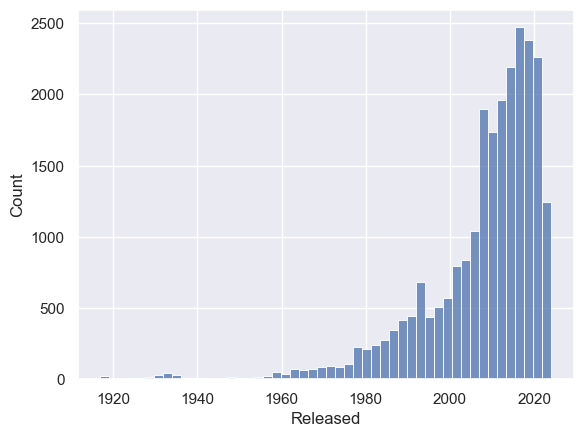

In [23]:
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")

sns.histplot(data=df_copy, x="Released", bins=50)
plt.savefig(f"./images/histplot_Released.png") # Saving the image to the images folder
plt.show()

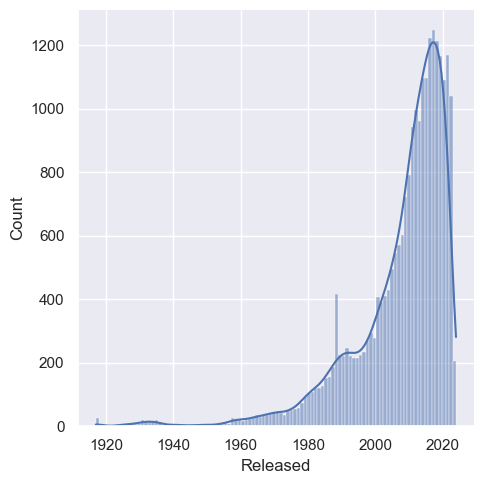

In [24]:
sns.displot(data = df_copy , x = 'Released' , kde = True) #anderson darling
plt.savefig(f"./images/displot_Released.png") # Saving the image to the images folder

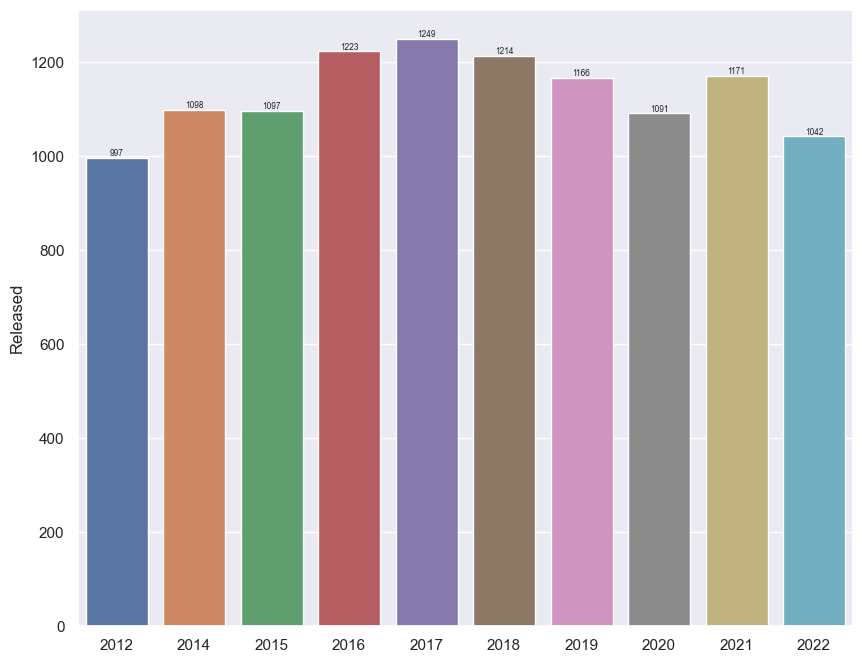

In [19]:
utils.barplot_top10(df_copy['Released'],'Released')

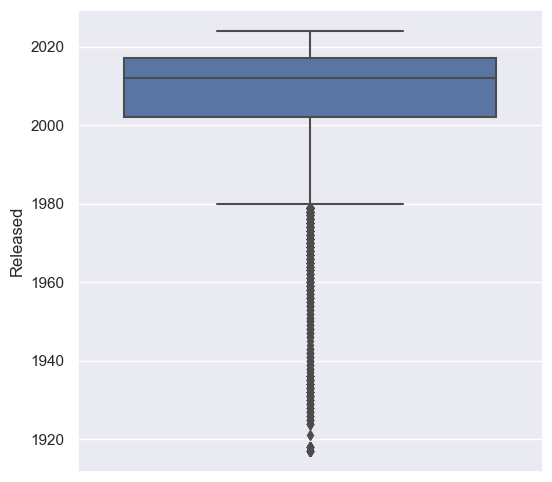

In [32]:
utils.box(df_copy,'Released')

Right now Bleach: Sennen Kessen-hen (Released in 2022) is in the first position with 9.11 and 80321 votes. Fullmetal Alchemist: Brotherhood (released in 2009) is in second position with 1933742 votes. However, since Fullmetal Alchemist: Brotherhood has more votes, I would consider it as number 1

In [33]:
df_copy.sort_values(by = 'Rank', ascending = True).head(10)

,English_Title,Type,Source,N_Episodes,Duration,Rating,Score,Scored_by,Rank,Genre,Theme,Released,Studios,Producers
16645,Bleach: Sennen Kessen-hen,TV,Manga,13,24.0,R - 17+ (violence & profanity),9.11,80321,1,"Action,Adventure,Fantasy",Unknown,2022,Pierrot,"TV Tokyo,Aniplex,Dentsu,Shueisha"
3961,Fullmetal Alchemist: Brotherhood,TV,Manga,64,24.0,R - 17+ (violence & profanity),9.11,1933742,2,"Action,Adventure,Drama,Fantasy",Military,2009,Bones,"Aniplex,Square Enix,Mainichi Broadcasting Syst..."
17635,Kaguya-sama wa Kokurasetai: Ultra Romantic,TV,Manga,13,23.0,PG-13 - Teens 13 or older,9.09,373142,3,"Comedy,Romance","Psychological,School",2022,A-1 Pictures,"Aniplex,Mainichi Broadcasting System,Magic Cap..."
5669,Steins;Gate,TV,Visual novel,24,24.0,PG-13 - Teens 13 or older,9.08,1286088,4,"Drama,Sci-Fi,Suspense","Psychological,Time Travel",2011,White Fox,"Frontier Works,Media Factory,Movic,AT-X,Kadoka..."
9883,Gintama°,TV,Manga,51,24.0,PG-13 - Teens 13 or older,9.07,227495,5,"Action,Comedy,Sci-Fi","Gag Humor,Historical,Parody,Samurai",2015,Bandai Namco Pictures,"TV Tokyo,Aniplex,Dentsu"
14879,Shingeki no Kyojin Season 3 Part 2,TV,Manga,10,23.0,R - 17+ (violence & profanity),9.06,1386387,6,"Action,Drama","Gore,Military,Survival",2019,Wit Studio,"Production I.G,Dentsu,Mainichi Broadcasting Sy..."
5991,Gintama',TV,Manga,51,24.0,PG-13 - Teens 13 or older,9.05,217364,7,"Action,Comedy,Sci-Fi","Gag Humor,Historical,Parody,Samurai",2011,Sunrise,"TV Tokyo,Aniplex,Dentsu,Trinity Sound,Miracle ..."
15542,Gintama: The Final,Movie,Manga,1,104.0,PG-13 - Teens 13 or older,9.05,56776,8,"Action,Comedy,Drama,Sci-Fi","Gag Humor,Historical,Parody,Samurai",2021,Bandai Namco Pictures,"TV Tokyo,Warner Bros. Japan"
7242,Gintama': Enchousen,TV,Manga,13,24.0,PG-13 - Teens 13 or older,9.04,151944,9,"Action,Comedy,Sci-Fi","Gag Humor,Historical,Parody,Samurai",2012,Sunrise,"TV Tokyo,Aniplex,Dentsu,Shueisha,Miracle Bus"
6458,Hunter x Hunter (2011),TV,Manga,148,23.0,PG-13 - Teens 13 or older,9.04,1569486,10,"Action,Adventure,Fantasy",Unknown,2011,Madhouse,"VAP,Nippon Television Network,Shueisha"


### Categorical Columns

#### Dictribución de variables categóricas

#### Type

First lets define some of this names:
- **Original Net Animation (ONA)** is an anime that is directly released onto the Internet.
- **Original Video Animation (OVA)** is an animated film or series made specially for release in home-video formats. OVA is created for selling (by Video or DVD). It's intended to the small number of viewer without advertisement. It means more otaku friendly theme.
- **Movie** are just regular movies of the anime, it could be part of the story or ir could be not.
- **TV** regular anime series broadcasted on TV.
- **Special** (aka TV Special) is not weekly. Usually yearly or one shot. It's have only one episode but it's have longer length (ex 2 hours). It's still intended for broadcast.
- **Music** are Anime Music Video (anime music video, better known by the acronym AMV), is a music video generally made with an Anime theme. The main characteristic of AMVs is that they are composed of scenes from one or more anime series or movies accompanied by a song that seeks to synchronize with the rhythm of the latter.

As we can see below, most of the anime are TV type (regular series).

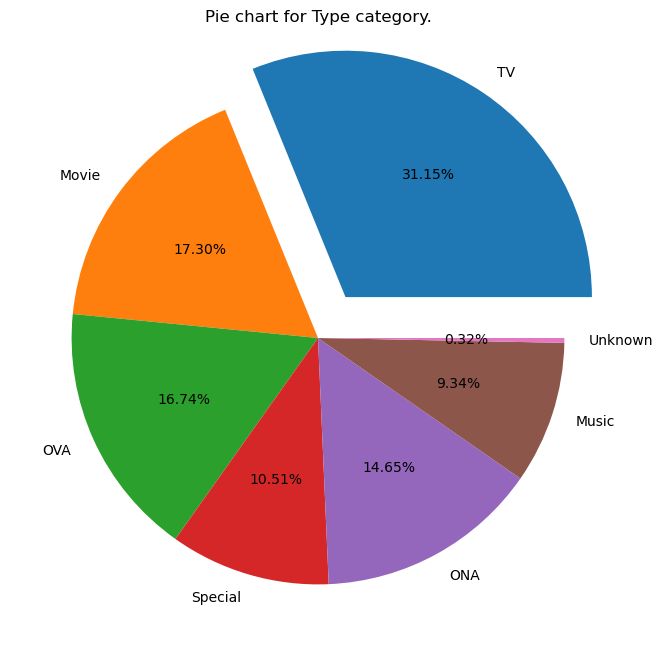

In [3]:
utils.pieplot(df_copy["Type"],"Type")

In [35]:
ntype = df_copy['Type'].value_counts()
ntype

TV         7509
Movie      4169
OVA        4034
ONA        3531
Special    2534
Music      2252
Unknown      76
Name: Type, dtype: int64

#### Source

So what is source material? It's the material that's the source of the story or content used in an anime. Sometimes anime have original stories, which I'll get to in a bit, but often they're based off pre-existing works such as manga, light novels, visual novels, etc....

We can see that most of the anime comes from an original idea (where anime companies write up the plot and design the characters themselves). Manga and game are also a popular sources for animes. Of all the anime we have in the list, 24105 ,there are a total of 14681 that come from an original source, manga or game. This means that 60.90437666685334995 % of the anime belong to this group.

In [36]:
nsource_top10 = df_copy['Source'].value_counts()

In [37]:
nsource_top10

Original        8920
Manga           4570
Unknown         3899
Game            1191
Visual novel    1102
Other            964
Light novel      951
Novel            735
Web manga        383
Music            378
4-koma manga     312
Picture book     198
Book             177
Mixed media      125
Web novel        118
Card game         69
Radio             13
Name: Source, dtype: int64

In [38]:
main_sources = df_copy[(df_copy['Source'].isin(['Original', 'Manga',"Game"]))]

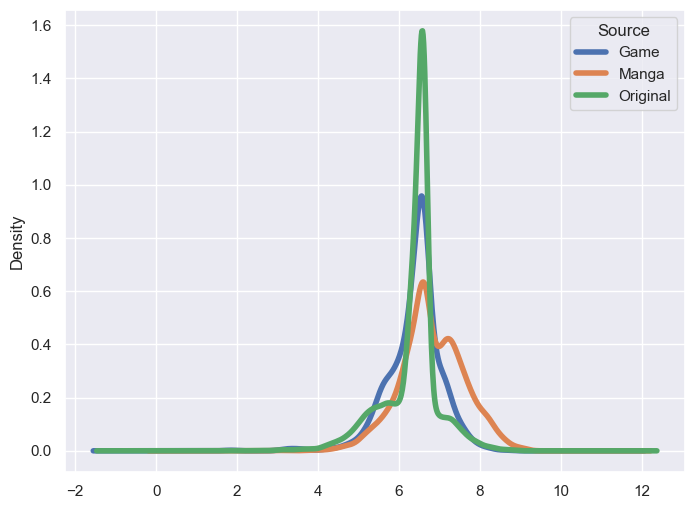

In [40]:
# Converting to wide dataframe
data_wide = main_sources.pivot(columns = 'Source',
                     values = "Score")
  
# plotting multiple density plot
data_wide.plot.kde(figsize = (8, 6),
                   linewidth = 4)
plt.savefig(f"./images/density_Source_Score.png") # Saving the image to the images folder

In [41]:
print("Of all the anime we have in the list,",len(df_copy),",there are a total of",len(main_sources),"that come from an original source, manga or game. This means that",
((len(main_sources) * 100) / len(df_copy)),"% of the anime belong to this group.")

Of all the anime we have in the list, 24105 ,there are a total of 14681 that come from an original source, manga or game. This means that 60.904376685334995 % of the anime belong to this group.


#### Rating

These only represent target demographics and don’t describe what content is in the anime

- Rated G: General audiences – All ages admitted.
- Rated PG: Parental guidance suggested – Some material may not be suitable for children.
- Rated PG-13: Parents strongly cautioned – Some material may be inappropriate for children under 13.
- Rated R: Restricted – Under 17 requires accompanying parent or adult guardian.
- Rated Rx: Hentai. No one under 18 admitted.
- Rated R+: Means that there is nudity. Restricted – Under 17 requires accompanying parent or adult guardian

In [42]:
df_copy["Rating"].value_counts()

PG-13 - Teens 13 or older         8192
G - All Ages                      7230
PG - Children                     3989
Rx - Hentai                       1455
R - 17+ (violence & profanity)    1376
R+ - Mild Nudity                  1073
Unknown                            790
Name: Rating, dtype: int64

In [43]:
df_copy["Rating"].unique()

array(['R - 17+ (violence & profanity)', 'PG-13 - Teens 13 or older',
       'PG - Children', 'R+ - Mild Nudity', 'G - All Ages', 'Rx - Hentai',
       'Unknown'], dtype=object)

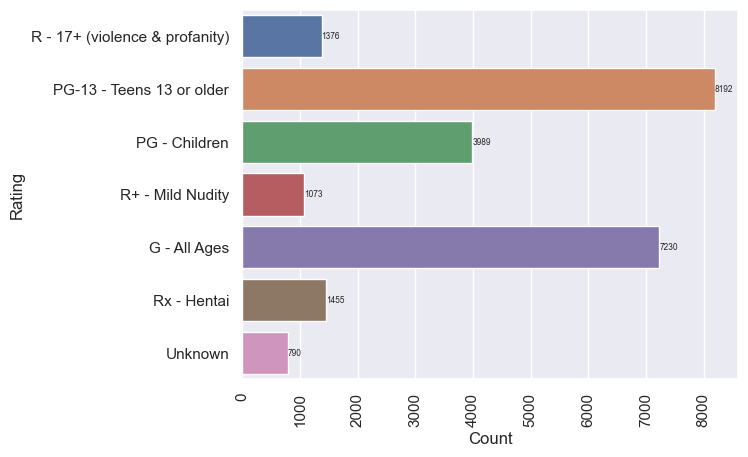

<Figure size 640x480 with 0 Axes>

In [44]:
utils.simple_barplot(df_copy["Rating"],"Rating")

#### Genre

The different types of anime are in the dozens. If you’re an avid watcher of the Big 3 Anime, then you may have come to learn that every show is based on a specific anime genre.

Today, anime is available in a wide range of genres such as drama, action, supernatural, and horror, to mention a few. They are made for a young girl or young boy as well as adults. They feature tough female characters and handsome male characters.

We can appreciate that Comedy Genre is the most typical one.

Hacer ztest para demostrar hipotesis.!!!!!!!!!!!!!

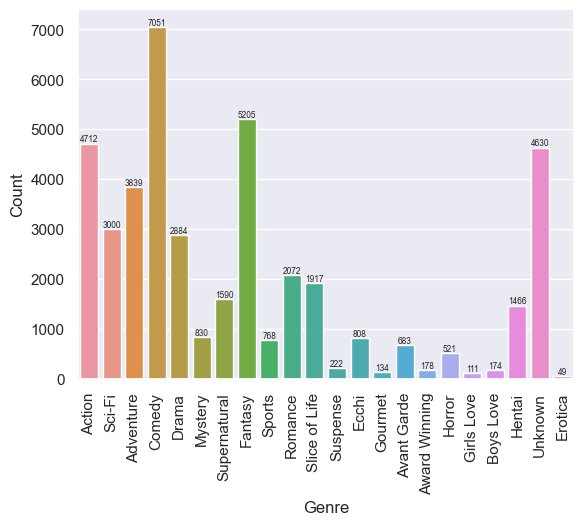

In [45]:
# Genres: Top 10. sns.barplot
utils.complex_barplot(df_copy["Genre"],"Genre")

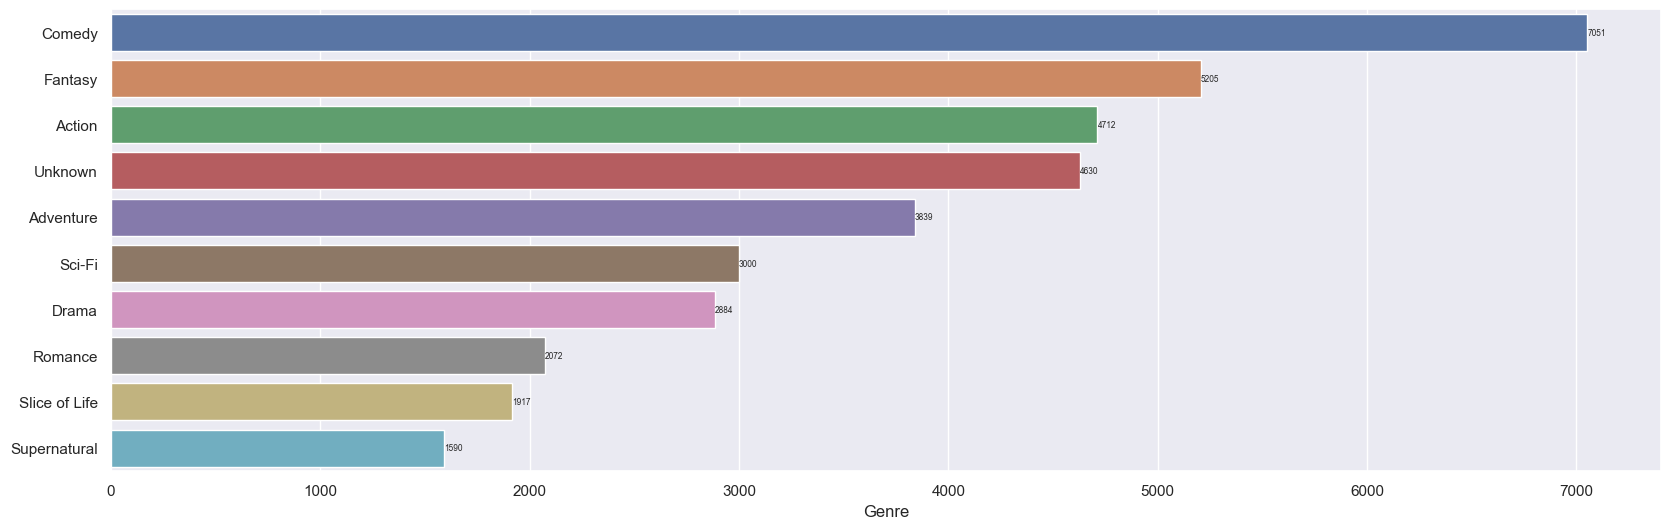

In [46]:
# Genres: Top 10. sns.barplot
utils.complex_barplot_top10(df_copy["Genre"],"Genre")

#### Theme

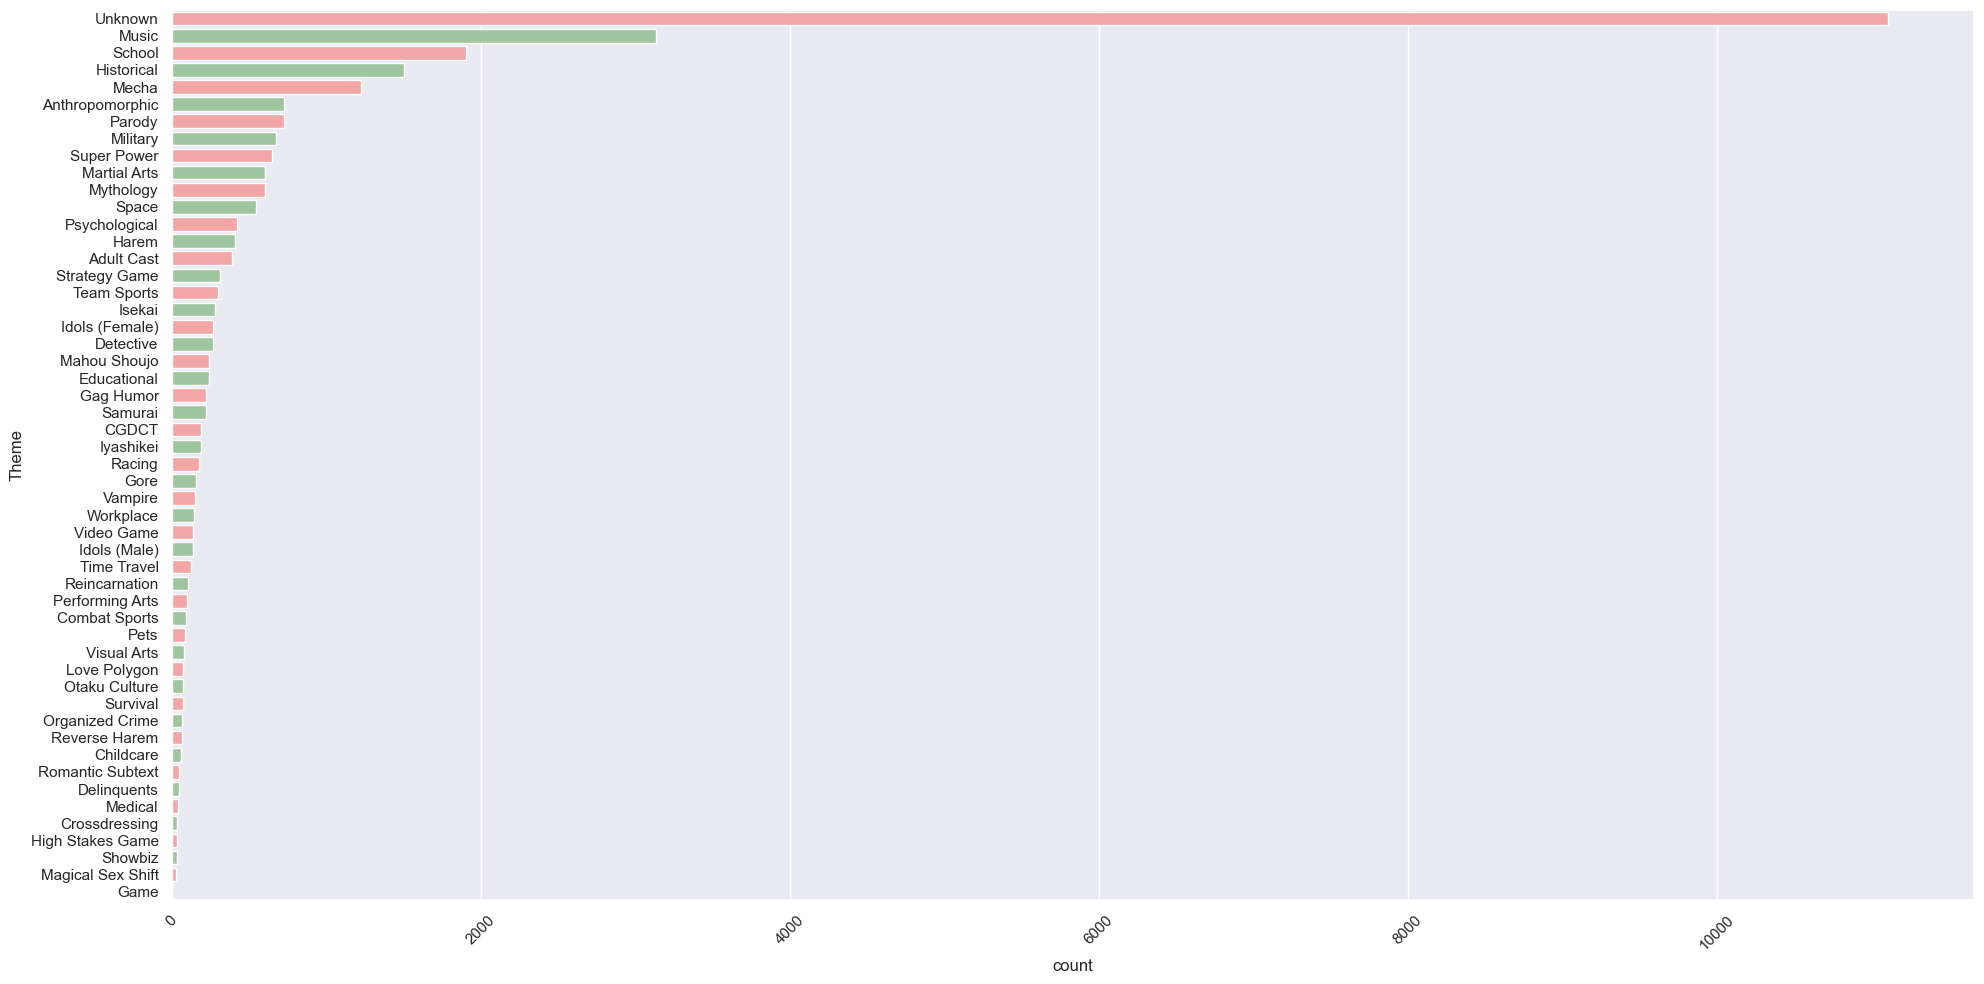

In [47]:
utils.countplot(df_copy["Theme"],"Theme")

#### Producers

Top 10 producers with unknowns and Top 10 producers without unknowns

NHK, Nippon Hoso Kyokai (Japan Broadcasting Corporation), is the producer with the most anime in the world. However, it is a public entity. So Aniplex would be the first private company that most anime produces.

Really easy to understand why Aniplex is leading the chart. It has tittles like Fullmetal Alchemist: Brotherhood,Sword Art Online, Naruto, Naruto: Shippuuden, Kimetsu no Yaiba, Ao no Exorcist, Nanatsu no Taizai, Bleach, Soul Eater, etc With tittles like this under them, pretty normal that they lead.

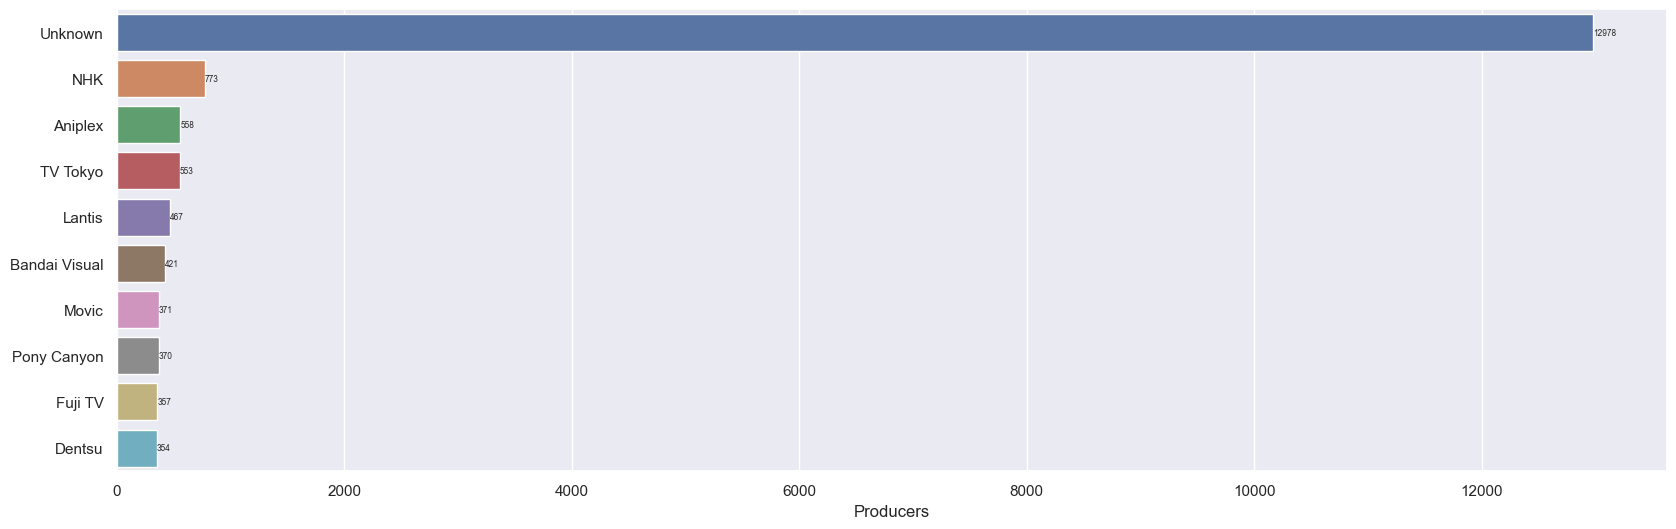

In [48]:
utils.complex_barplot_top10(df_copy["Producers"],"Producers")

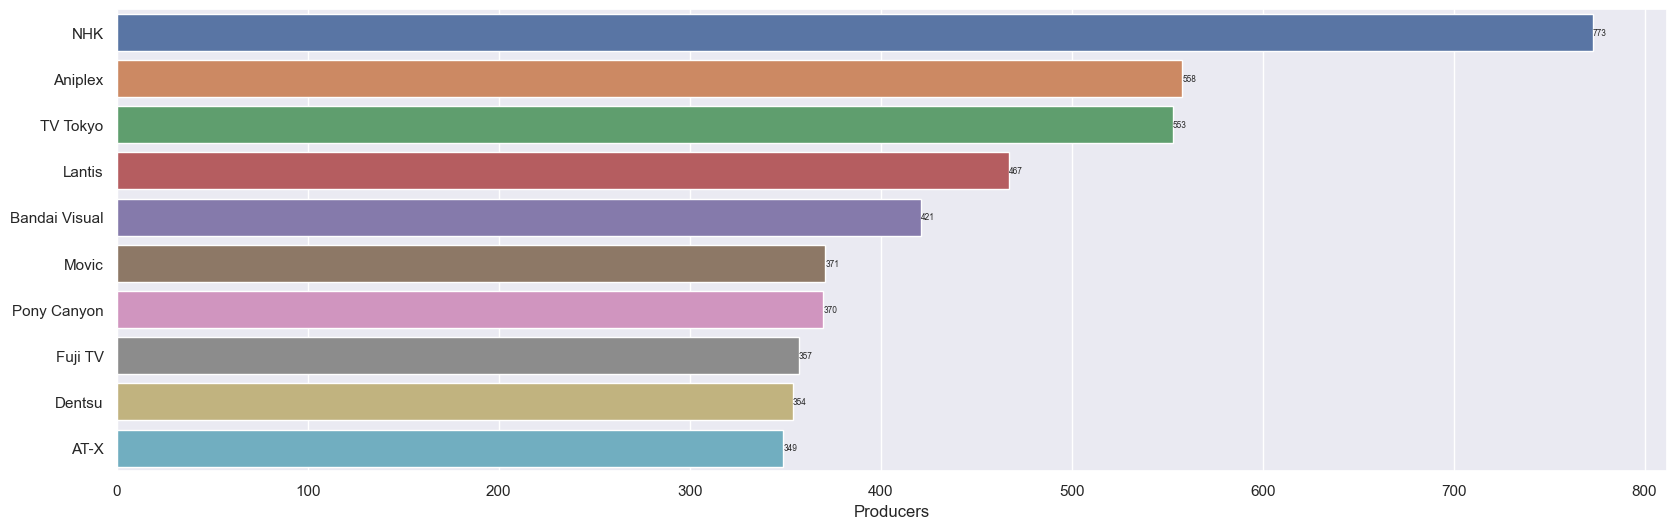

In [49]:
df_copy2 = df_copy.copy()
no_unknown = df_copy2[df_copy2["Producers"] != "Unknown"]
utils.complex_barplot_top10(no_unknown["Producers"],"Producers")

#### Studios

Top 10 Studios with unknowns and Top 10 Studios without unknowns

Toei Animation is the first private company with the most anime in the world. Not really surprising due to it is a studio nearly as old as anime itself, Toei Animation started as Japan Animated Films in 1948. Becoming a formidable powerhouse in the 1960s, the studio was responsible for classic, influential series such as Dragon Ball, Fist of the North Star, Slam Dunk, Mazinger Z, Galaxy Express 999, One Piece, and Sailor Moon.

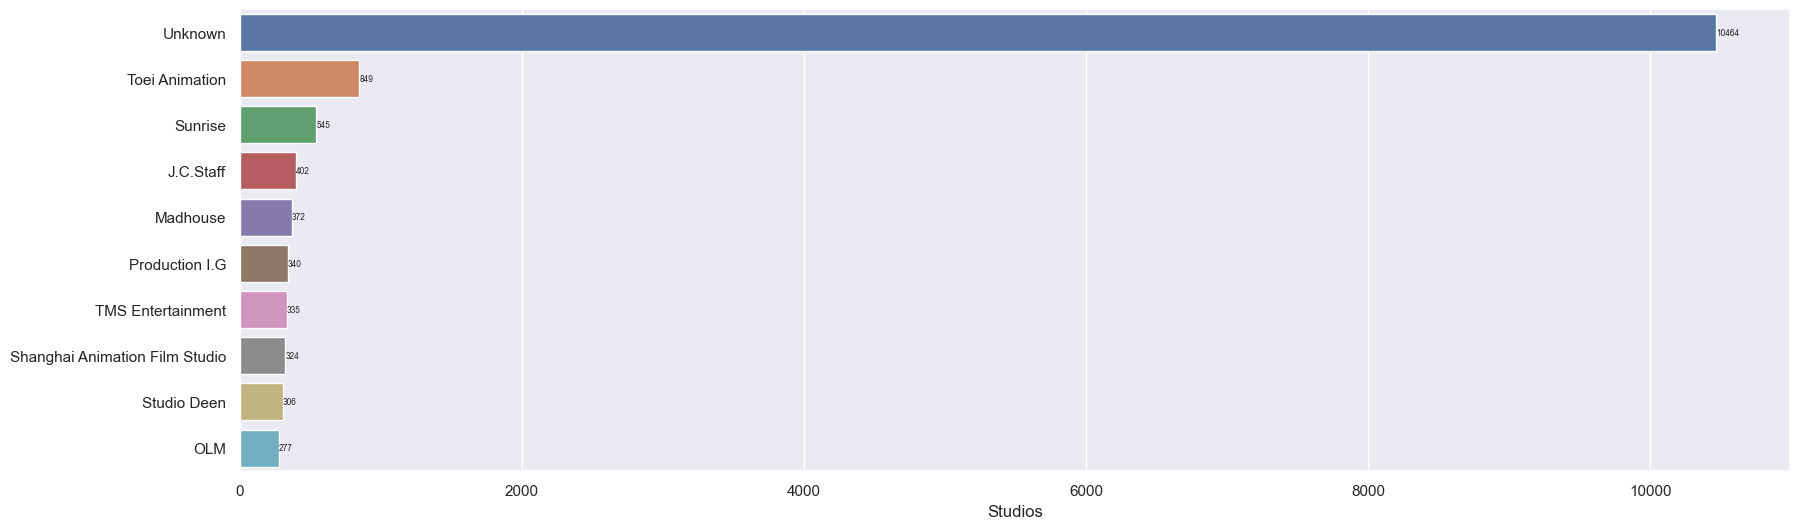

In [50]:
# Studios: Top 10. sns.barplot
utils.complex_barplot_top10(df_copy["Studios"],"Studios")

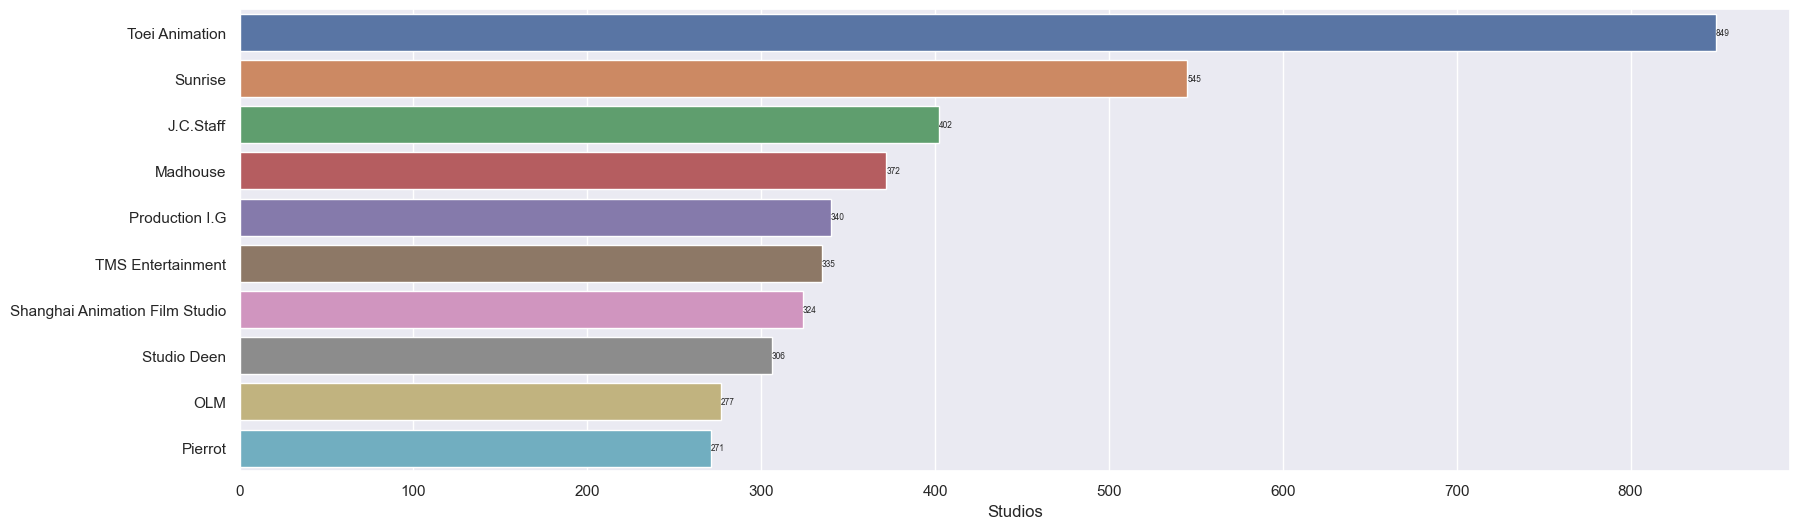

In [51]:
no_unknown = df_copy2[df_copy2["Studios"] != "Unknown"]
utils.complex_barplot_top10(no_unknown["Studios"],"Studios")

## Bi-Dimensional-Analysis

### Score and Type

We can check grafically the Score of each Type with the mean. 

This boxplot shows that the Types with better mean are Light novel, Manga and Novel.

It requieres mores analytical study

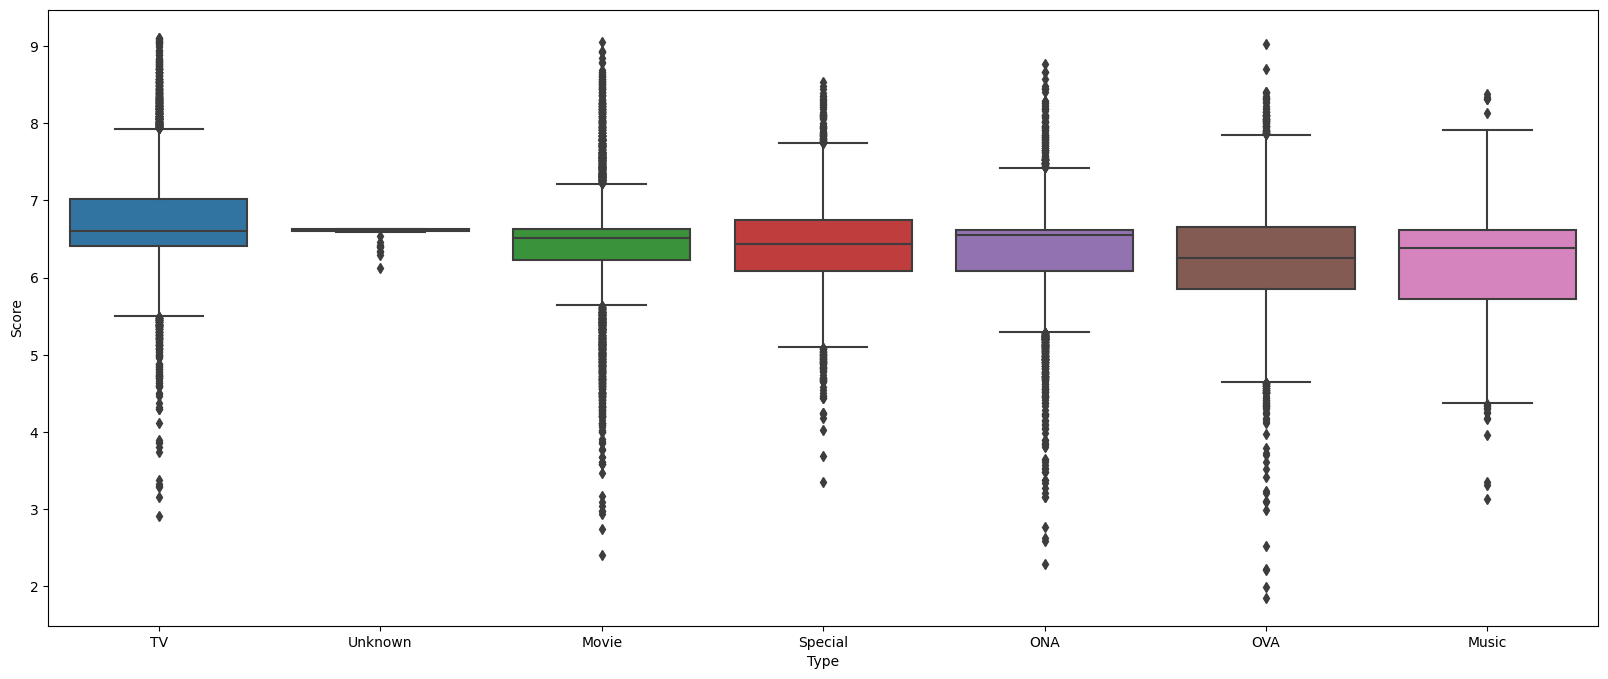

In [10]:
mean = df_copy.groupby(['Type'] , as_index=False).agg({'Score' : 'mean'}).sort_values('Score' , ascending = False)
utils.box_bidi(df_copy,mean,'Type','Score')

We calculate the mean,median, min and max of Score for each Source. From the top 10 Sources.

It shows that the Sources with better mean are TV, Movie and Specials.

In [76]:
top_10_Score = utils.various(df_copy,'Type','Score') # finding the mean, median, min and max of Score
top_10_Score

Score                         
             mean    median   min      max
Type                                      
TV       6.715764  6.598315  2.91  9.11000
Unknown  6.584459  6.618241  6.12  6.62804
Movie    6.429894  6.520000  2.40  9.05000
Special  6.420673  6.434526  3.35  8.54000
ONA      6.328962  6.550301  2.29  8.77000
OVA      6.265786  6.260000  1.85  9.03000
Music    6.182972  6.387958  3.13  8.38000

Now that we have that auxiliar dataframe, we need to unify the Source by its name and calculate the mean,median, min and max of Scored_by for each Source. From the top 10 Sources.


It shows that the Source with better mean are TV, ONA and Movie.

In [77]:
top_10_Scored_by = utils.various(df_copy,'Type','Scored_by') # finding the mean, median, min and max of Scored_by
top_10_Scored_by

Scored_by                      
                 mean   median min      max
Type                                       
TV       99997.016913  15327.0   7  4125905
ONA      67098.823280   2105.0   0  4128912
Movie    52538.337251   3819.0   0  2113452
OVA      26750.072385   2394.0   1  1650790
Unknown  19307.855263   3274.5  34   279164
Special  19191.662194   2488.0   0  1400265
Music    15936.709147    610.0   8   783563

We also check the coefficient of variation of Score and Scored_by. I tis possible to see those were the scores are more regular TV, Special and Music.Those that their score are more iregular like Movie, OVA and ONA.

In [55]:
#create a new auxiliar dataframe
df_copy_aux = pd.DataFrame() 

#Set the Rating columns with their score
df_copy_aux['Type'] =df_copy['Type']
df_copy_aux['Score'] =df_copy['Score']
df_copy_aux['Scored_by'] =df_copy['Scored_by']

# Group a dataframe and calculate coefficient of variation
df_copy_aux.groupby('Type').apply(lambda x: np.std(x, ddof=1) / np.mean(x)).sort_values('Score' , ascending = False)

,Score,Scored_by
Type,,
Movie,0.126655,5.913974
OVA,0.117100,9.425140
ONA,0.104425,7.796345
Music,0.104079,5.655682
Special,0.102092,6.817547
TV,0.094912,3.766870
Unknown,0.014019,64.668327


Let's remember the results of the unidimensional analysis of Types:

In [56]:
ntype

TV         7509
Movie      4169
OVA        4034
ONA        3531
Special    2534
Music      2252
Unknown      76
Name: Type, dtype: int64

Taking into account this results, this are the possible ways to go for.

- 1. If the goal is to reach as many people as possible ,eventhough we might have iregular score, the best three Types to go for are: TV, ONA and Movie.

- 2. If the goal is about the score there are two options:
        - Not Having the best score but the most regular one, the best three Types to go for are: TV, Special and Music.
        - Having the best score but not regular, the best three Types to go for are: TV, Movie and Specials.

Howerver, taking also into account the results of the unidimensional analysis of Types:
- Specias and Music types has less animes then the rest.
- TV, Movie and OVA has mores animes then the rest
- ONA is increasing rapidly thanks to the online distribution companies like Netflix.
Go fot TV, Movie and ONA would be the best idea

### Score and Source

We can check grafically the Score of each Source with the mean. 

This boxplot shows that the Sources with better mean are Light novel, Manga and Novel.

It requieres mores analytical study

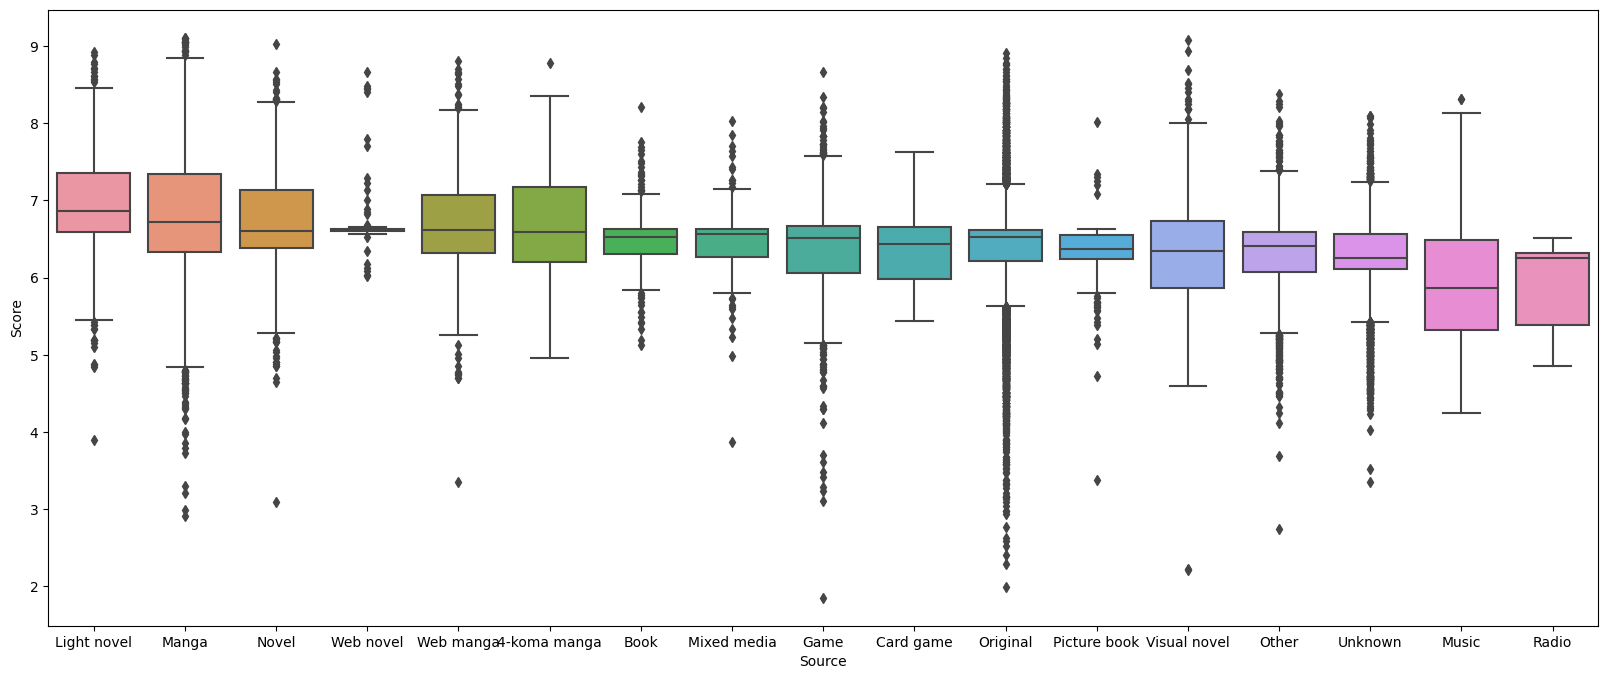

In [11]:
mean = df_copy.groupby(['Source'] , as_index=False).agg({'Score' : 'mean'}).sort_values('Score' , ascending = False)
utils.box_bidi(df_copy,mean,'Source','Score')

We calculate the mean,median, min and max of Score for each Source. From the top 10 Sources.

It shows that the Sources with better mean are Light novel, Manga and Novel.

In [74]:
top_10_Score = utils.various(df_copy,'Source','Score') # finding the mean, median, min and max of Score
top_10_Score

Score                      
                  mean    median   min   max
Source                                      
Light novel   6.936777  6.870000  3.90  8.92
Manga         6.808442  6.720000  2.91  9.11
Novel         6.724102  6.608612  3.09  9.03
Web novel     6.712726  6.616334  6.02  8.66
Web manga     6.674496  6.612601  3.35  8.81
4-koma manga  6.659434  6.588360  4.96  8.78
Book          6.508041  6.524908  5.13  8.21
Mixed media   6.461490  6.570860  3.87  8.03
Game          6.399492  6.512886  1.85  8.66
Card game     6.349354  6.430000  5.44  7.63

Now that we have that auxiliar dataframe, we need to unify the Source by its name and calculate the mean,median, min and max of Scored_by for each Source. From the top 10 Sources.


It shows that the Source with better mean are Light novel, Radio and Original.

In [75]:
top_10_Scored_by = utils.various(df_copy,'Source','Scored_by') # finding the mean, median, min and max of Scored_by
top_10_Scored_by

Scored_by                       
                      mean   median  min      max
Source                                           
Light novel   98362.619348  25598.0    7  2011482
Original      75785.548094   4151.0    3  4128912
Radio         60704.615385   1895.0  105   710474
Unknown       55386.275712   2160.0    1  4125905
Manga         52862.519037   6206.5    0  3371923
Other         52506.056017   3144.0    2  4027113
Web manga     52055.438642   6357.0   26  2047625
Book          50475.067797   5145.0  110  1494226
4-koma manga  32562.711538   7046.0   64   537536
Picture book  30411.641414   4478.5    2   657301

We also check the coefficient of variation of Score and Scored_by. I tis possible to see those were the scores are more regular Web novel, Picture book and Book.Those that their score are more iregular like Music, Manga and Web manga.

In [60]:
#create a new auxiliar dataframe
df_copy_aux = pd.DataFrame() 

#Set the Rating columns with their score
df_copy_aux['Source'] =df_copy['Source']
df_copy_aux['Score'] =df_copy['Score']
df_copy_aux['Scored_by'] =df_copy['Scored_by']

# Group a dataframe and calculate coefficient of variation
df_copy_aux.groupby('Source').apply(lambda x: np.std(x, ddof=1) / np.mean(x)).sort_values('Score' , ascending = False)

,Score,Scored_by
Source,,
Music,0.129471,5.202485
Manga,0.117149,3.390833
Web manga,0.110569,3.576082
Visual novel,0.108484,3.893348
Original,0.107949,6.513916
4-koma manga,0.105820,2.567235
Novel,0.105060,3.640975
Game,0.101873,6.771364
Other,0.099552,6.629459


Let's remember the results of the unidimensional analysis of Sources:

In [61]:
nsource_top10

Original        8920
Manga           4570
Unknown         3899
Game            1191
Visual novel    1102
Other            964
Light novel      951
Novel            735
Web manga        383
Music            378
4-koma manga     312
Picture book     198
Book             177
Mixed media      125
Web novel        118
Card game         69
Radio             13
Name: Source, dtype: int64

Taking into account this results, this are the possible ways to go for.

- 1. If the goal is to reach as many people as possible ,eventhough we might have iregular score, the best three Sources to go for are: Light novel, Radio and Original.

- 2. If the goal is about the score there are two options:
        - Not Having the best score but the most regular one, the best three Sources to go for are: Web novel, Picture book and Book.
        - Having the best score but not regular, the best three Sources to go for are: Light novel, Manga and Novel.

Howerver, taking also into account the results of the unidimensional analysis of Sources:
- Picture book, Book, Radio and Web novel has almost no animes. It would be risky to go for this ones.
- The best idea would be to go for Light novel, Manga and Original Sources

### Score and Number of Episodes


Let's do a scatterplot to see the relationship between different variables (Score and Duration of the episodes).

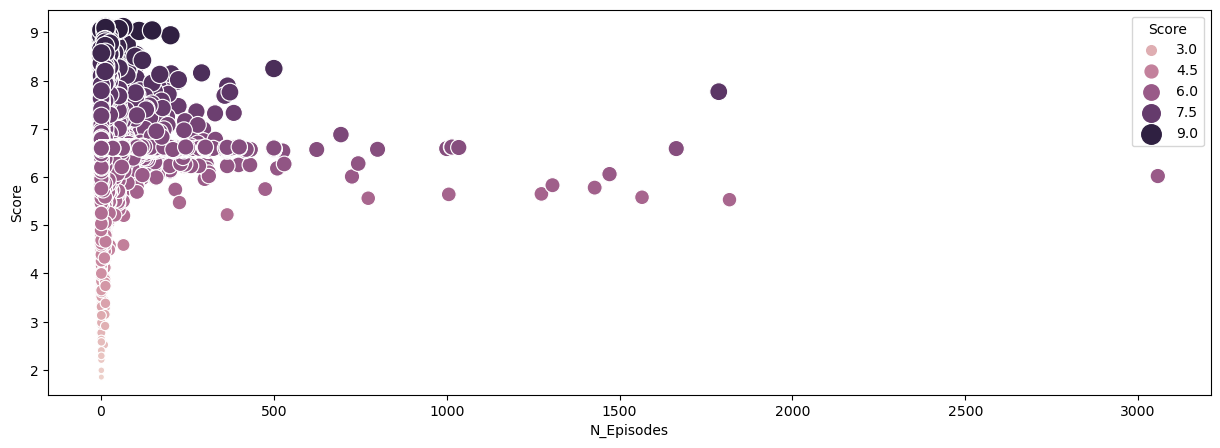

In [6]:
utils.scat(df_copy,"N_Episodes","Score","N_Episodes_VS_Score")

We observe some outliers that do not let us see properly the scatterplot.

There are 144 animes with more than 200 episodes in total

Since we hace 24thousand records, we will avoid those 144 animes in the plot. So we will be able to see it clearly.

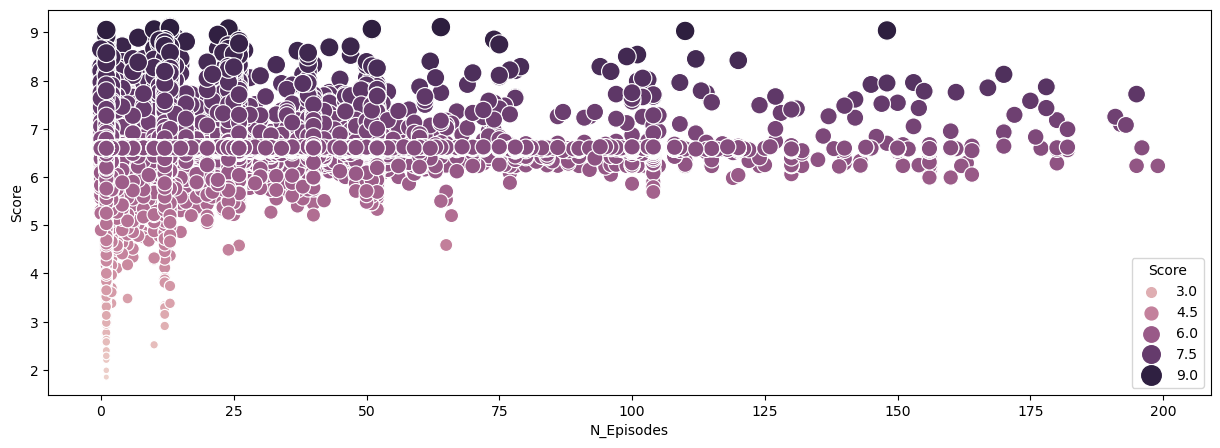

In [7]:
until2000 = df_copy[df_copy["N_Episodes"] < 200] #there are a couple of outliers, it is better to do not take them into account
utils.scat(until2000,"N_Episodes","Score","N_Episodes_VS_Score_Less200")

It seems that there is correlation between Score and Number of Episodes. However let's do some test to prove it.

A Spearman test will be perform to investigate the relationship between Score and Number of Episodes.

I will measures the strength of that relationship

In [64]:
# Spearman's Rank Correlation Test
# Revisamos la correlacion
df_copy['N_Episodes'].corr(df_copy['Score'] , method = 'spearman')

0.19521856752418962

A Spearman test is considered as very weak (0 to 0.19)

A Pearson test was performed to investigate the relationship between Score and Number of Episodes
Results of the test showed there was a positive, weak correlation between the two variables

Next we are going to test whether Score and Number of Episodes have a dependency relationship.

Assumptions:

- Observations in each sample are independent and identically distributed (iid).
- Observations in each sample can be ranked.

Interpretation

- H0: there is a dependency between the samples.
- H1: the two samples are independent.

In [65]:
# Pearson's dependency test
from scipy.stats import pearsonr
data1 = df_copy['N_Episodes']
data2 = df_copy['Score']
stat, p = pearsonr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))

stat=0.070, p=0.000


- <ins>Correlation test:</ins> Results of the test showed there was a positive, very weak correlation between the two variables . 
- <ins>Dependency relationship test:</ins> P-Value is 0, it indicates that there is no association between the two variables.
- <ins>Conclusion:</ins> We reject the null hyphotesis but We cannot reject the alternative hyphotesis The two samples are independent. 
- <ins>Observations:</ins> We can say that as the number of episodes increases, it does not mean that it will have a higher value. So the number of episodes does not influence. Or it does not mean by having many chapters , it will have better valuation.
Seems that the higher concentration of higher scores are between 12 and 25 episodes

### Score and Duration of the episodes

Let's do a scatterplot to see the relationship between different variables (Score and Duration of the episodes).

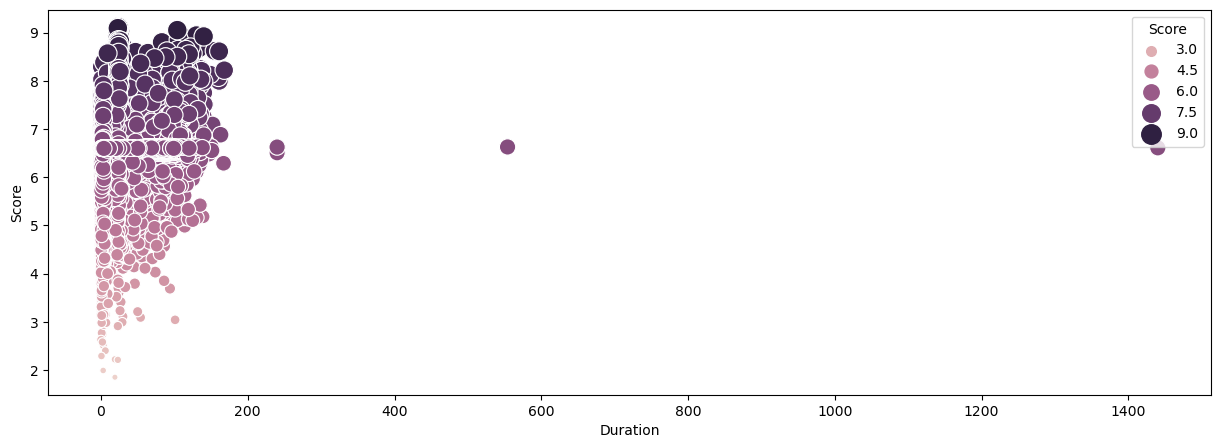

In [3]:
utils.scat(df_copy,"Duration","Score","Duration_VS_Score")

We observe 4 outliers that do not let us see properly the scatterplot.

Since there are only 4 outliers, we will discard them from the plotting.

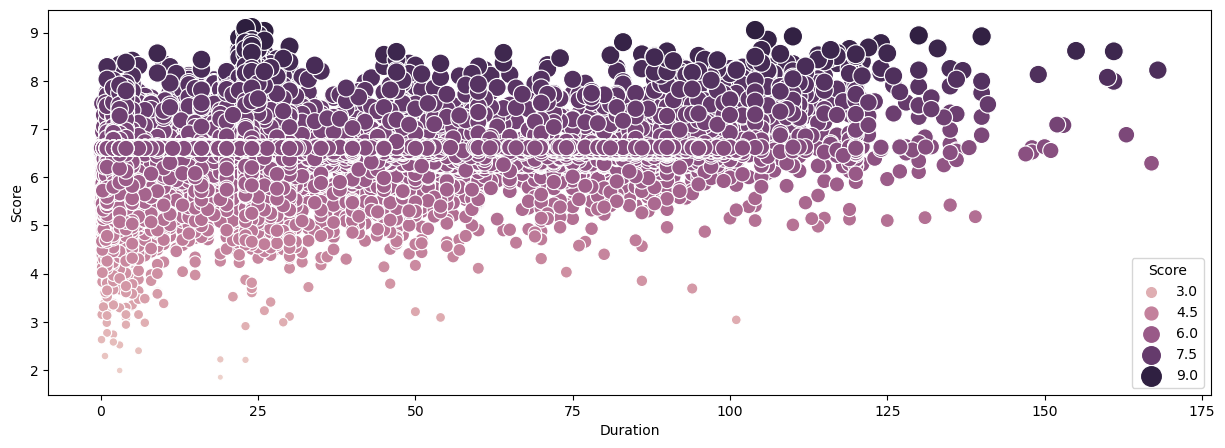

In [4]:
until400 = df_copy[df_copy["Duration"] < 200] #there are a couple of outliers, it is better to do not taking them into account
utils.scat(until400,"Duration","Score","Duration_VS_Score_less 200")

It seems that there is correlation between Score and Duration of the episodes. However let's do some test to prove it.

A Spearman test will be perform to investigate the relationship between Score and Duration of the episodes.

I will measures the strength of that relationship

In [68]:
# Spearman's Rank Correlation Test
# Revisamos la correlacion
df_copy['Duration'].corr(df_copy['Score'], method = 'spearman')

0.22198404630151367

The Spearman rank correlation is considered as weak  (0.20 to 0.39)

Results of the correlation test showed there was a positive, weak correlation between the two variables

Next we are going to test whether Score and Duration of the episodes have a dependency relationship.

Assumptions:

- Observations in each sample are independent and identically distributed (iid).
- Observations in each sample can be ranked.

Interpretation

- H0: there is a dependency between the samples.
- H1: the two samples are independent.

In [69]:
# Spearman' dependency test
from scipy.stats import spearmanr
data1 = df_copy['Score']
data2 = df_copy['Duration']
stat, p = spearmanr(data1, data2)
print('stat=%.33f, p=%.3f' % (stat, p))

stat=0.221984046301513665566673694229394, p=0.000


- <ins>Correlation test:</ins> Results of the test showed there was a positive, weak correlation between the two variables . 
- <ins>Dependency relationship test:</ins> P-Value is 0, it indicates that there is no association between the two variables.
- <ins>Conclusion:</ins> We reject the null hyphotesis but We cannot reject the alternative hyphotesis The two samples are independent. 
- <ins>Observations:</ins> We can say that as the Duration of the episodes increases, it does not mean that it will have a higher value. So the Duration of the episodes does not influence. Or it does not mean by having more duration , it will have better valuation. 

### Score and Rating

We are going to creat an auxiliar dataframe with three columns Genre, Score and Scored_by.

Since the Genre column could have different Genre for one raw, we need to separate and assign to each one of them the respective Score and Scored_by


In [8]:
df_rating = df_copy.groupby(["Rating", "Type"]).size().reset_index(name="Times")
df_rating = df_rating[df_rating["Type"] == "TV"]
df_rating

,Rating,Type,Times
5,G - All Ages,TV,1341
12,PG - Children,TV,2435
19,PG-13 - Teens 13 or older,TV,2690
26,R - 17+ (violence & profanity),TV,549
33,R+ - Mild Nudity,TV,261
44,Unknown,TV,233


We can check grafically the Score of each Rating with the mean. 

This boxplot shows that the means are pretty much the same. But slighly better in Romance, Sci-Fi and Drama. 
We will not take into account Hentai, because animated porno is not the goal of the company.

It requieres mores analytical study

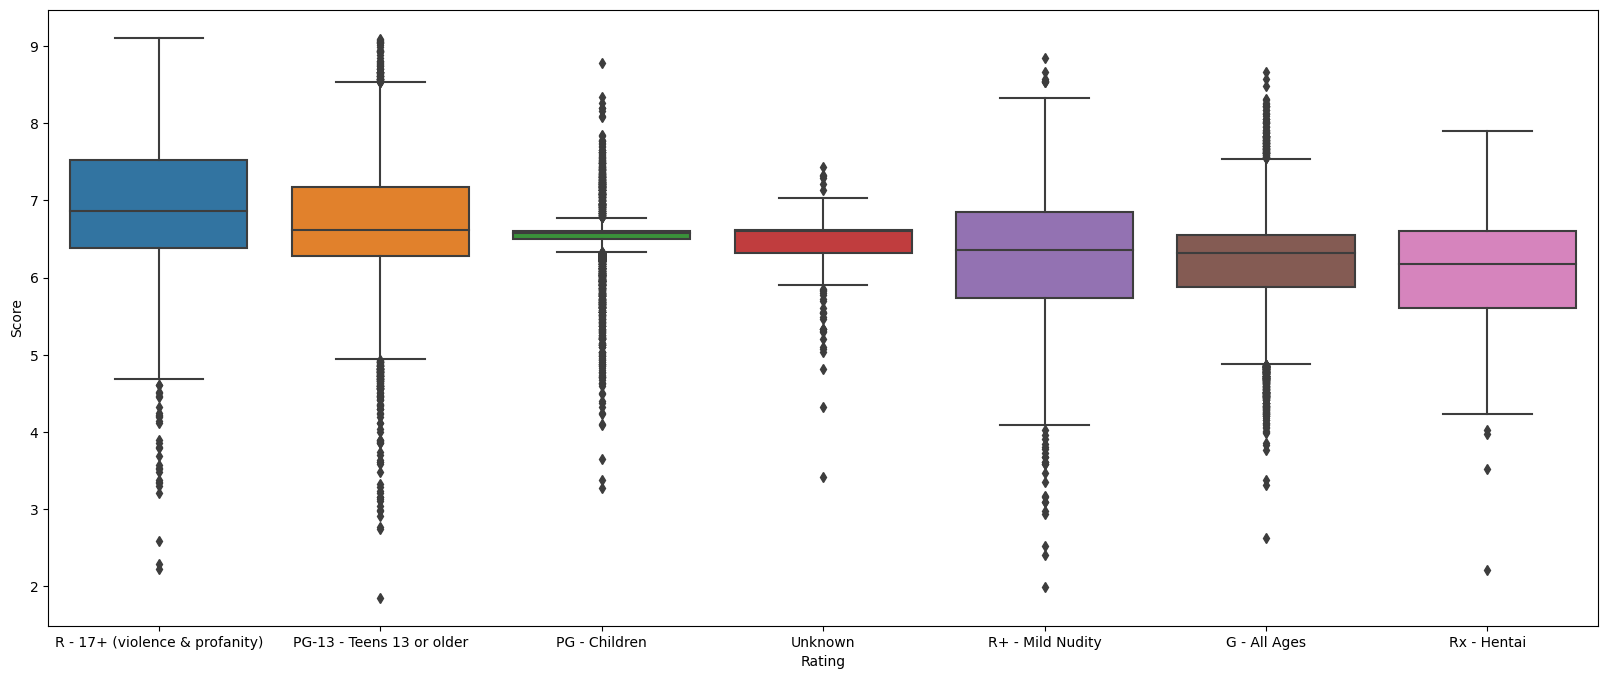

In [9]:
mean = df_copy.groupby(['Rating'] , as_index=False).agg({'Score' : 'mean'}).sort_values('Score' , ascending = False)
utils.box_bidi(df_copy,mean,'Rating','Score')

We calculate the mean,median, min and max of Score for each Rating. From the top 10 Rating.

It shows that the Rating with better mean are Production R - 17+ (violence & profanity), PG-13 - Teens 13 or older and PG - Children.

In [71]:
top_10_Score = utils.various(df_copy,'Rating','Score') # finding the mean, median, min and max of Score
top_10_Score

Score                      
                                    mean    median   min   max
Rating                                                        
R - 17+ (violence & profanity)  6.882970  6.865000  2.22  9.11
PG-13 - Teens 13 or older       6.683179  6.623080  1.85  9.09
PG - Children                   6.495474  6.577830  3.27  8.78
Unknown                         6.463277  6.599874  3.41  7.44
R+ - Mild Nudity                6.265436  6.360000  1.99  8.85
G - All Ages                    6.185382  6.316877  2.63  8.66
Rx - Hentai                     6.098950  6.170000  2.21  7.90

Now that we have that auxiliar dataframe, we need to unify the Ratings by its name and calculate the mean,median, min and max of Scored_by for each Rating. From the top 10 Ratings.


It shows that the Ratings with better mean are PG - Children, R - 17+ (violence & profanity) and G - All Ages.

In [70]:
top_10_Scored_by = utils.various(df_copy,'Rating','Scored_by') # finding the mean, median, min and max of Scored_by
top_10_Scored_by

Scored_by                       
                                         mean   median  min      max
Rating                                                              
PG - Children                   137004.455001  14269.0    4  4127786
R - 17+ (violence & profanity)   93470.055233  15635.0    3  2554804
G - All Ages                     42597.671369   1493.0    1  4128912
R+ - Mild Nudity                 42325.785648   5638.0    6  1581878
Unknown                          41535.712658   4252.5    2  1556639
PG-13 - Teens 13 or older        40835.374268   4435.0    0  3688044
Rx - Hentai                       3350.725086   1820.0  113   191517

We also check the coefficient of variation of Score and Scored_by. I tis possible to see those were the scores are more regular PG - Children or G - All Ages and those that their score are more iregular like R+ - Mild Nudity and R - 17+ (violence & profanity).

In [74]:
#create a new auxiliar dataframe
df_copy_aux = pd.DataFrame() 

#Set the Rating columns with their score
df_copy_aux['Rating'] =df_copy['Rating']
df_copy_aux['Score'] =df_copy['Score']
df_copy_aux['Scored_by'] =df_copy['Scored_by']

# Group a dataframe and calculate coefficient of variation
df_copy_aux.groupby('Rating').apply(lambda x: np.std(x, ddof=1) / np.mean(x)).sort_values('Score' , ascending = False)

,Score,Scored_by
Rating,,
R+ - Mild Nudity,0.148224,4.343502
R - 17+ (violence & profanity),0.136874,2.577308
PG-13 - Teens 13 or older,0.113721,3.584067
Rx - Hentai,0.113070,2.700367
G - All Ages,0.100157,8.815201
PG - Children,0.059216,5.073127
Unknown,0.045300,28.582256


Doing some research we found some titles for each category:

R - 17+ (violence & profanity)
- Goblin Slayer
- Berserk
- Elfen Lied
- Hellsing 

PG-13 - Teens 13 or older
- My Hero Academia
- Sword Art Online The Movie
- Fullmetal Alchemist the Movie
- One Piece Film
- Naruto

PG - Children
- Spirited Away
- Pom Poko
- Avatar
- Howl's Moving Castle

Taking into account this results, this are the possible ways to go for.

- 1. If the goal is to reach as many people as possible ,eventhough we might have iregular score, the best three Ratings to go for are: PG - Children, R - 17+ (violence & profanity) and G - All Ages.

- 2. If the goal is about the score there are two options:
        - Not Having the best score but the most regular one, the best three Ratings to go for are: PG - Children or G - All Ages.
        - Having the best score but not regular, the best three Ratings to go for are: R - 17+ (violence & profanity), PG-13 - Teens 13 or older and PG - Children.

### Score and Genre

We are going to creat an auxiliar dataframe with three columns Genre, Score and Scored_by.

Since the Genre column could have different Genre for one raw, we need to separate and assign to each one of them the respective Score and Scored_by


In [68]:
# Create a copy of df_copy
df_anime = df_copy.copy()

#Since the infomation are in lists we separate the information to have a better analysis of them. 
df_anime['Genre_Split'] = df_anime['Genre'].apply(lambda x : x.split(','))

#create a new auxiliar dataframe
df_copy_aux = pd.DataFrame() 

#Set the Genre columns with their score
df_copy_aux['Genre'] = pd.Series([x for _list in df_anime['Genre_Split'] for x in _list]) # split the information by comma.
df_copy_aux['Score'] = utils.series_extract(df_anime,'Genre', 'Score') #Funciton to extract the data of a column with respect to another column.
df_copy_aux['Scored_by'] = utils.series_extract(df_anime,'Genre_Split', 'Scored_by') #Funciton to extract the data of a column with respect to another column.
top10 = df_copy_aux[df_copy_aux['Genre'].isin(df_anime['Genre'].str.split(',').explode().value_counts()[0:11].index)] # find the top 10

We can check grafically the Score of each Genre with the mean. 

This boxplot shows that the means are pretty much the same. But slighly better in Romance, Sci-Fi and Drama. 
We will not take into account Hentai, because animated porno is not the goal of the company.

It requieres mores analytical study

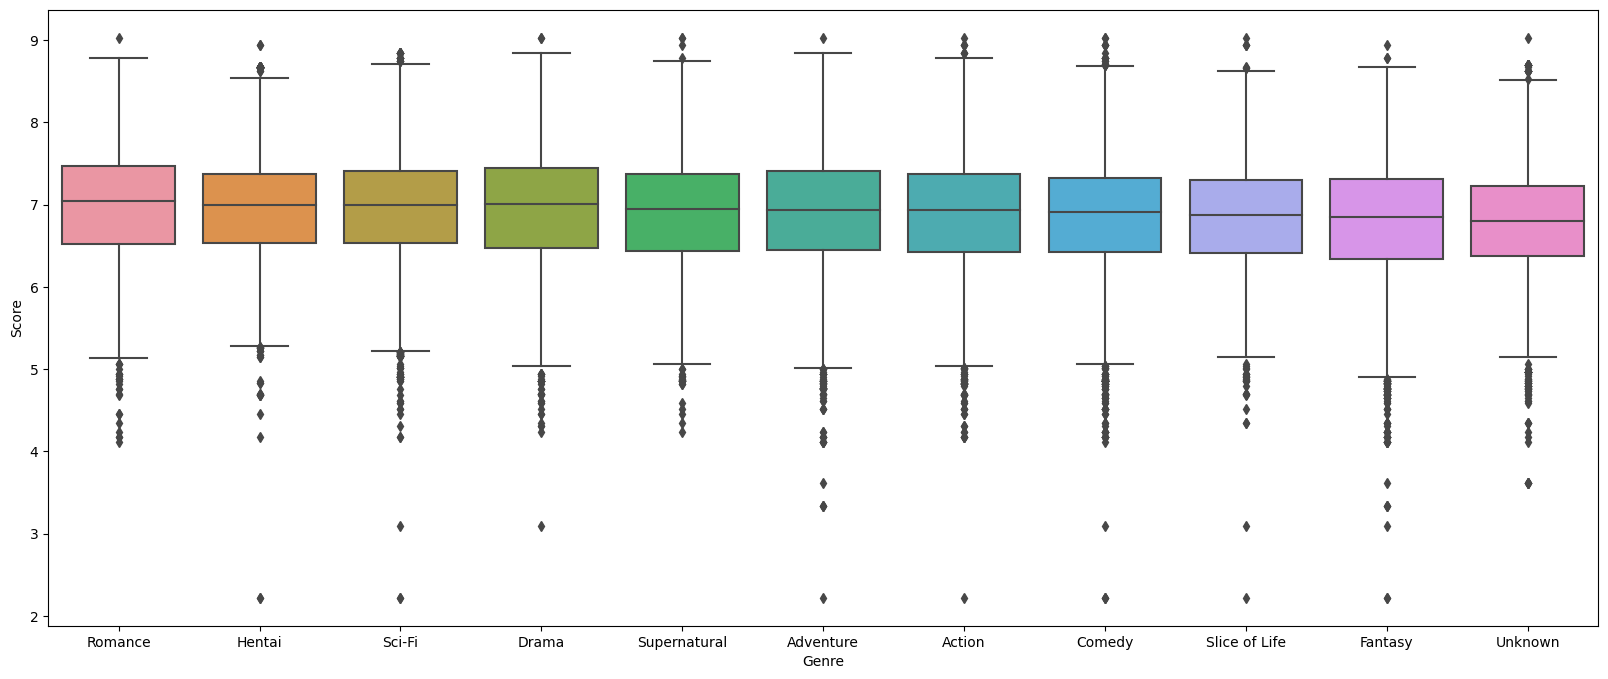

In [18]:
mean = top10.groupby(['Genre'] , as_index=False).agg({'Score' : 'mean'}).sort_values('Score' , ascending = False)
utils.box_bidi(df_copy_aux,mean,'Genre','Score')

Now that we have that auxiliar dataframe, we need to unify the Genre by its name and calculate the mean,median, min and max of Score for each Genre. From the top 10 Genres.

It confirmas the boxplot, that the Genres with better mean are Romance, Sci-Fi and Drama.

In [77]:
top_10_Score = utils.various(top10,'Genre','Score') # finding the mean, median, min and max of Score
top_10_Score

Score                   
                   mean median   min   max
Genre                                     
Romance        6.981447   7.04  4.11  9.03
Hentai         6.959182   7.00  2.22  8.94
Sci-Fi         6.954737   7.00  2.22  8.85
Drama          6.953298   7.01  3.09  9.03
Supernatural   6.900145   6.95  4.24  9.03
Adventure      6.896871   6.94  2.22  9.03
Action         6.894336   6.94  2.22  9.03
Comedy         6.868456   6.91  2.22  9.03
Slice of Life  6.840565   6.88  2.22  9.03
Fantasy        6.792027   6.85  2.22  8.94

Now that we have that auxiliar dataframe, we need to unify the Genre by its name and calculate the mean,median, min and max of Scored_by for each Genre. From the top 10 Genres.


It shows that the Genres with better mean are Supernatural, Fantasy and Romance.

In [69]:
top_10_Scored_by = utils.various(top10,'Genre','Scored_by') # finding the mean, median, min and max of Scored_by
top_10_Scored_by

Scored_by                     
                       mean  median min      max
Genre                                           
Unknown        87739.613823  3960.5   1  4127786
Fantasy        72304.437848  6514.0   0  4125905
Supernatural   62715.076101  7945.5   0  3688044
Romance        58279.396236  9289.0   6  2011482
Drama          56606.485784  6223.0   6  2554804
Adventure      55636.747591  4573.0   2  3298982
Action         54443.315365  4823.0   0  2554804
Comedy         49121.644022  4838.0   0  4128912
Sci-Fi         38875.956000  4085.0  17  1866134
Slice of Life  32962.775170  4449.0   2  1311695

We also check the coefficient of variation of Score and Scored_by. I tis possible to see those were the scores are more regular like Slice of Life, Sci-Fi or Romance and those that their score are more iregular like Adventure, Fantasy and Action.

In [79]:
# Group a dataframe and calculate coefficient of variation
top10.groupby('Genre').apply(lambda x: np.std(x, ddof=1) / np.mean(x)).sort_values('Score' , ascending = False)

,Score,Scored_by
Genre,,
Fantasy,0.116002,4.381558
Adventure,0.110825,4.316449
Action,0.109082,3.473258
Drama,0.108373,3.927941
Supernatural,0.108079,3.155532
Comedy,0.107416,5.747615
Romance,0.106876,2.381233
Sci-Fi,0.106729,3.936526
Hentai,0.106257,2.777146


Taking into account this results, this are the possible ways to go for.

- 1. If the goal is to reach as many people as possible ,eventhough we might have iregular score, the best three Genres to go for are: Supernatural, Fantasy and Romance.

- 2. If the goal is about the score there are two options:
        - Not Having the best score but the most regular one, the best three Genres to go for are: Slice of Life, Sci-Fi or Romance.
        - Having the best score but not regular, the best three Genres to go for are: Romance, Sci-Fi and Drama.

### Score and Theme

We are going to creat an auxiliar dataframe with three columns Theme, Score and Scored_by.

Since the Theme column could have different Theme for one raw, we need to separate and assign to each one of them the respective Score and Scored_by


In [66]:
# Create a copy of df_copy
df_anime = df_copy.copy()

#Since the infomation are in lists we separate the information to have a better analysis of them. 
df_anime['Theme_Split'] = df_anime['Theme'].apply(lambda x : x.split(','))

#create a new auxiliar dataframe
df_copy_aux = pd.DataFrame() 

#Set the Theme columns with their score
df_copy_aux['Theme'] = pd.Series([x for _list in df_anime['Theme_Split'] for x in _list]) # split the information by comma.
df_copy_aux['Score'] = utils.series_extract(df_anime,'Theme', 'Score') #Funciton to extract the data of a column with respect to another column.
df_copy_aux['Scored_by'] = utils.series_extract(df_anime,'Theme_Split', 'Scored_by') #Funciton to extract the data of a column with respect to another column.
top10 = df_copy_aux[df_copy_aux['Theme'].isin(df_anime['Theme'].str.split(',').explode().value_counts()[0:11].index)] # find the top 10

We can check grafically the Score of each Theme with the mean. 

This boxplot shows that the means are pretty much the same. But slighly better in Mecha, Military and Super Power. It requieres mores analytical study

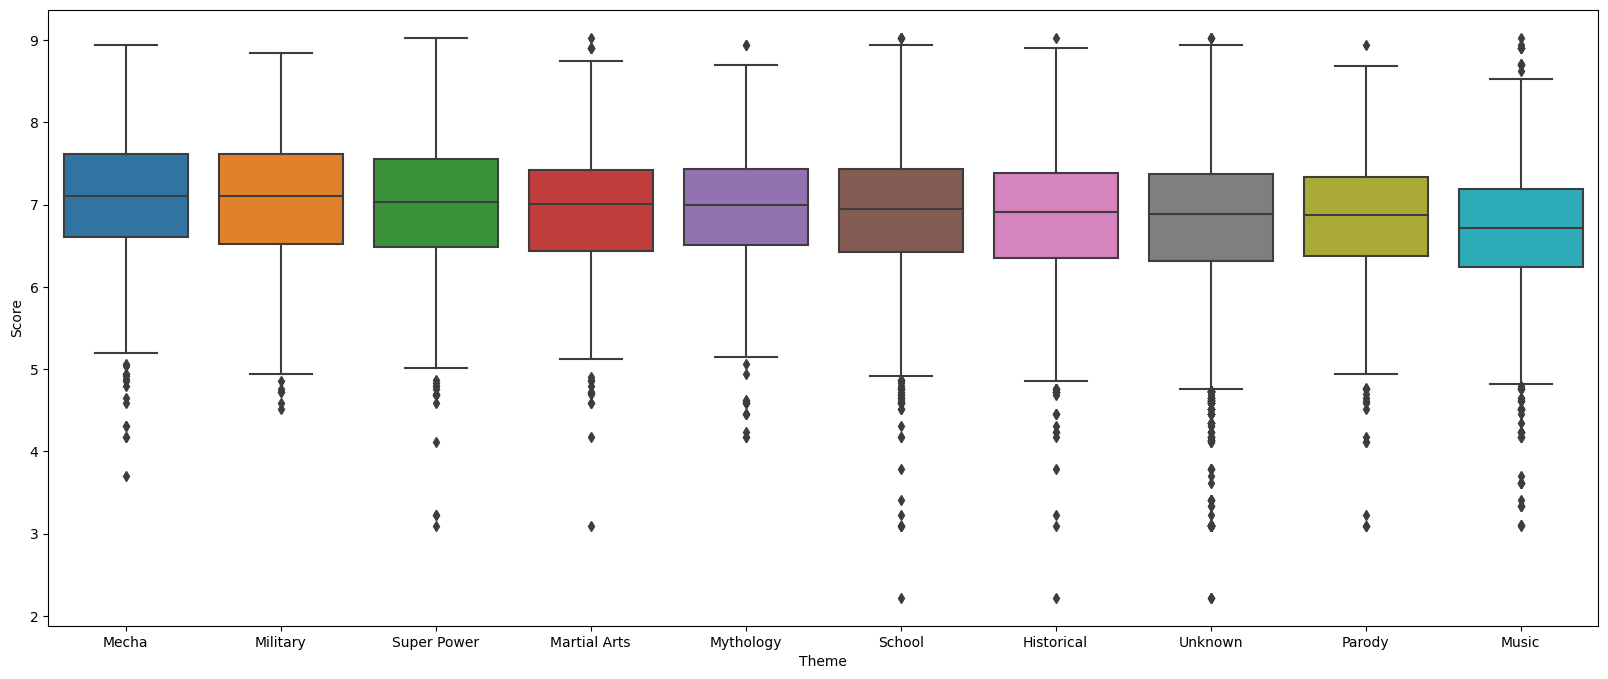

In [20]:
mean = top10.groupby(['Theme'] , as_index=False).agg({'Score' : 'mean'}).sort_values('Score' , ascending = False).head(10)
utils.box_bidi(df_copy_aux,mean,'Theme','Score')

Now that we have that auxiliar dataframe, we need to unify the Theme by its name and calculate the mean,median, min and max of Score for each Theme. From the top 10 Theme.

It confirmas the boxplot, that the Themes with better mean are Mecha, Military and Super Power.

In [82]:
top_10_Score = utils.various(top10,'Theme','Score') # finding the mean, median, min and max of Score
top_10_Score

Score                   
                  mean median   min   max
Theme                                    
Mecha         7.074089  7.110  3.70  8.94
Military      7.037845  7.100  4.51  8.85
Super Power   6.989333  7.030  3.09  9.03
Martial Arts  6.930396  7.005  3.09  9.03
Mythology     6.928585  7.000  4.17  8.94
School        6.904887  6.950  2.22  9.03
Historical    6.860463  6.910  2.22  9.03
Unknown       6.828389  6.890  2.22  9.03
Parody        6.820069  6.870  3.09  8.94
Music         6.687040  6.720  3.09  9.03

Now that we have that auxiliar dataframe, we need to unify the Theme by its name and calculate the mean,median, min and max of Scored_by for each Theme. From the top 10 Theme.


It shows that the Theme with better mean are Anthropomorphic, School and Super Power.

In [67]:
top_10_Scored_by = utils.various(top10,'Theme','Scored_by') # finding the mean, median, min and max of Scored_by
top_10_Scored_by

Scored_by                       
                          mean   median  min      max
Theme                                                
Anthropomorphic  205861.563361  31196.0   44  4118873
School            71842.141356  13145.0    0  1898783
Super Power       67173.983051  10018.0   41  2047625
Unknown           63542.958408   3819.5    0  4128912
Mythology         60195.835821   4384.0   33  2113452
Military          49539.936107   5736.0  101  2554804
Historical        45073.244667   3576.0   33  1827864
Parody            38766.771784   3470.0   12  2047625
Mecha             37236.290507   2965.5   17  2111993
Martial Arts      35203.192053   2609.5   77  1811391

We also check the coefficient of variation of Score and Scored_by. I tis possible to see those were the scores are more regular like Mecha or Mythology and those that their score are more iregular like Anthropomorphic or Super Power

In [84]:
# Group a dataframe and calculate coefficient of variation
top10.groupby('Theme').apply(lambda x: np.std(x, ddof=1) / np.mean(x)).sort_values('Score' , ascending = False)

,Score,Scored_by
Theme,,
Anthropomorphic,0.133040,3.772931
Parody,0.122309,4.069218
Super Power,0.121807,3.179654
Unknown,0.120079,7.261295
Historical,0.119683,4.496769
School,0.118293,2.408797
Martial Arts,0.118215,5.791825
Military,0.116598,4.001174
Music,0.116153,5.351533


Taking into account this results, this are the possible ways to go for.

- 1. If the goal is to reach as many people as possible ,eventhough we might have iregular score, the best three Themes to go for are: Anthropomorphic, School and Super Power.

- 2. If the goal is about the score there are two options:
        - Not Having the best score but the most regular one, the best three Themes to go for are: Mecha, Mythology and Music.
        - Having the best score but not regular, the best three Themes to go for are: Mecha, Military and Super Power.

### Score and Producers

We are going to creat an auxiliar dataframe with three columns Producers, Score and Scored_by.

Since the Producers column could have different Producers for one raw, we need to separate and assign to each one of them the respective Score and Scored_by


In [61]:
# Create a copy of df_copy
df_anime = df_copy.copy()

#Since the infomation are in lists we separate the information to have a better analysis of them. 
df_anime['Producers_Split'] = df_anime['Producers'].apply(lambda x : x.split(','))

#create a new auxiliar dataframe
df_copy_aux = pd.DataFrame() 

#Set the producers columns with their score
df_copy_aux['Producers'] = pd.Series([x for _list in df_anime['Producers_Split'] for x in _list]) # split the information by comma.
df_copy_aux['Score'] = utils.series_extract(df_anime,'Producers', 'Score') #Funciton to extract the data of a column with respect to another column.
df_copy_aux['Scored_by'] = utils.series_extract(df_anime,'Producers_Split', 'Scored_by') #Funciton to extract the data of a column with respect to another column.
top10 = df_copy_aux[df_copy_aux['Producers'].isin(df_anime['Producers'].str.split(',').explode().value_counts()[0:11].index)] # find the top 10


We can check grafically the Score of each Producer with the mean. This boxplot shows that the means are pretty much the same. It requieres mores analytical study

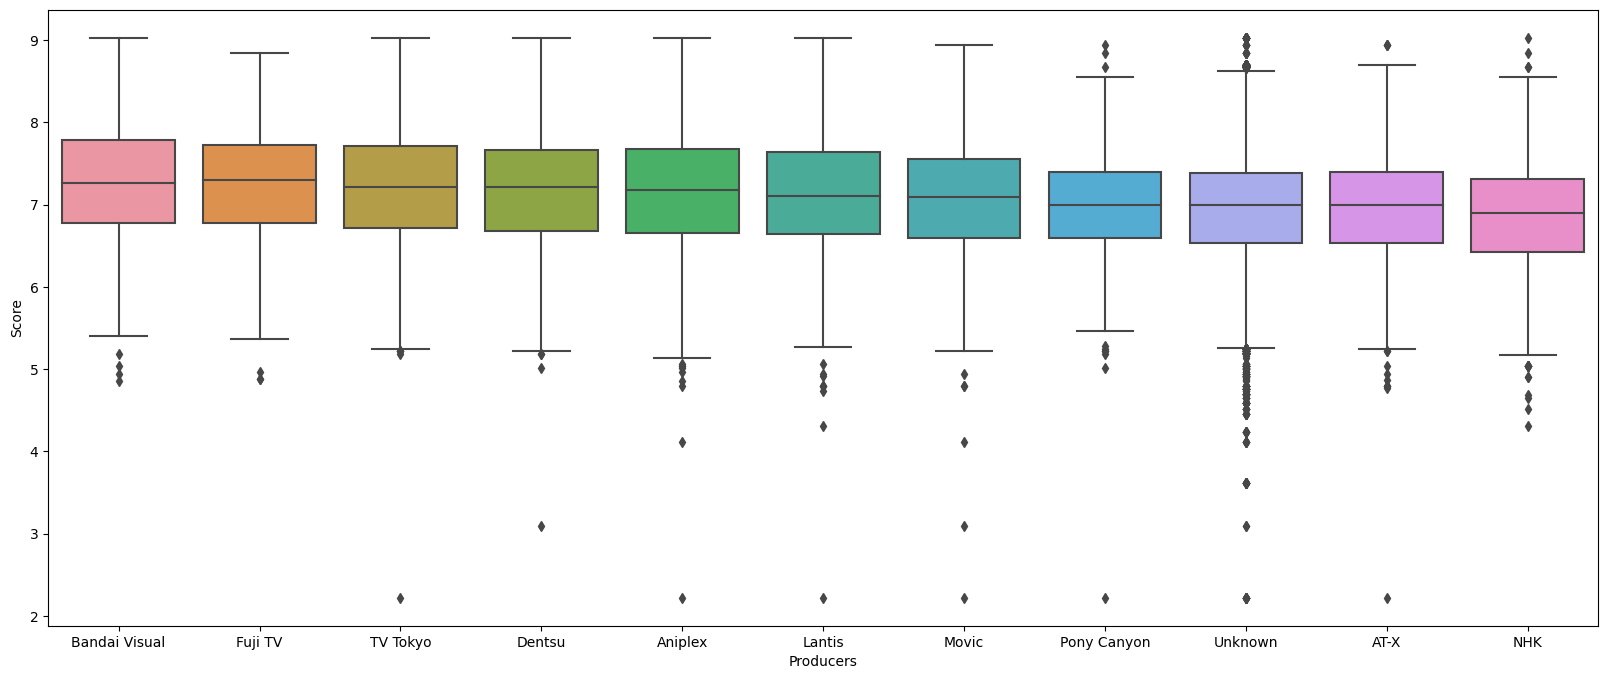

In [22]:
mean = top10.groupby(['Producers'] , as_index=False).agg({'Score' : 'mean'}).sort_values('Score' , ascending = False)
utils.box_bidi(df_copy_aux,mean,'Producers','Score')

Now that we have that auxiliar dataframe, we need to unify the Producers by its name and calculate the mean,median, min and max of Score for each Producer. From the top 10 Producers.

It shows that the Producers with better mean are Bandai Visual, Fuji TV and TV Tokyo.

In [87]:
top_10_Score = utils.various(top10,'Producers','Score') # finding the mean, median, min and max of Score
top_10_Score

Score                   
                   mean median   min   max
Producers                                 
Bandai Visual  7.284394  7.260  4.85  9.03
Fuji TV        7.251485  7.300  4.88  8.85
TV Tokyo       7.201465  7.220  2.22  9.03
Dentsu         7.178023  7.220  3.09  9.03
Aniplex        7.151595  7.175  2.22  9.03
Lantis         7.120236  7.110  2.22  9.03
Movic          7.081294  7.090  2.22  8.94
Pony Canyon    6.974838  6.990  2.22  8.94
Unknown        6.947467  7.000  2.22  9.03
AT-X           6.941461  6.990  2.22  8.94

Now that we have that auxiliar dataframe, we need to unify the Producers by its name and calculate the mean,median, min and max of Scored_by for each Producers. From the top 10 Studios.


It shows that the Producers with better mean are Dentsu, Movic and Aniplex.

In [62]:
top_10_Scored_by = utils.various(top10,'Producers','Scored_by') # finding the mean, median, min and max of Scored_by
top_10_Scored_by

Scored_by                       
                        mean   median  min      max
Producers                                          
Dentsu         192169.759887  46539.5  114  2554804
Movic          160091.566038  49017.0   96  1898783
Aniplex        153482.274194  49176.0  117  2011482
AT-X           132934.008596  68613.0   96  1442254
Pony Canyon     99686.697297  23238.5  104  2554804
Fuji TV         87661.128852  15245.0  131  1250813
Lantis          82159.199143  24281.0  127  2047625
TV Tokyo        72853.336347  12820.0  121  2047625
Unknown         67894.512406   3723.0    0  4128912
Bandai Visual   43384.330166   9616.0  120  2047625

We also check the coefficient of variation of Score and Scored_by. I tis possible to see those were the scores are more regular like Fuji TV or Bandai Visual and those that their score are more iregular like Lantis or Movic

In [89]:
# Group a dataframe and calculate coefficient of variation
top10.groupby('Producers').apply(lambda x: np.std(x, ddof=1) / np.mean(x)).sort_values('Score' , ascending = False)

,Score,Scored_by
Producers,,
Aniplex,0.114587,1.780259
Lantis,0.113323,2.135781
Movic,0.112961,1.713928
AT-X,0.111794,1.448191
Unknown,0.109032,7.139484
Dentsu,0.108199,1.804679
NHK,0.106444,6.234538
TV Tokyo,0.106250,2.722853
Pony Canyon,0.101995,2.675487


Taking into account this results, this are the possible ways to go for.

- 1. If the goal is to reach as many people as possible ,eventhough we might have iregular score, the best three Producers to go for are: Dentsu, Movic and Aniplex.

- 2. If the goal is about the score,the best three Producers to go for are: Bandai Visual, Fuji TV and TV Tokyo. This three has the best score and also happen to have the more regular scores.

### Score and Studios

We are going to creat an auxiliar dataframe with three columns Studios, Score and Scored_by.

Since the Studio column could have different Studios for one raw, we need to separate and assign to each one of them the respective Score and Scored_by


In [63]:
# Create a copy of df_copy
df_anime = df_copy.copy()

#Since the infomation are in lists we separate the information to have a better analysis of them. 
df_anime['Studios_Split'] = df_anime['Studios'].apply(lambda x : x.split(','))

#create a new auxiliar dataframe
df_copy_aux = pd.DataFrame() 

#Set the Studios columns with their score
df_copy_aux['Studios'] = pd.Series([x for _list in df_anime['Studios_Split'] for x in _list]) # split the information by comma.
df_copy_aux['Score'] = utils.series_extract(df_anime,'Studios_Split', 'Score') #Funciton to extract the data of a column with respect to another column.
df_copy_aux['Scored_by'] = utils.series_extract(df_anime,'Studios_Split', 'Scored_by') #Funciton to extract the data of a column with respect to another column.
top10 = df_copy_aux[df_copy_aux['Studios'].isin(df_anime['Studios'].str.split(',').explode().value_counts()[0:11].index)] # find the top 10


We can check grafically the Score of each studio with the mean. This boxplot shows that the means are pretty much the same but Shanghai Animation Film Studio seems a bit different than the rest. It requieres mores analytical study

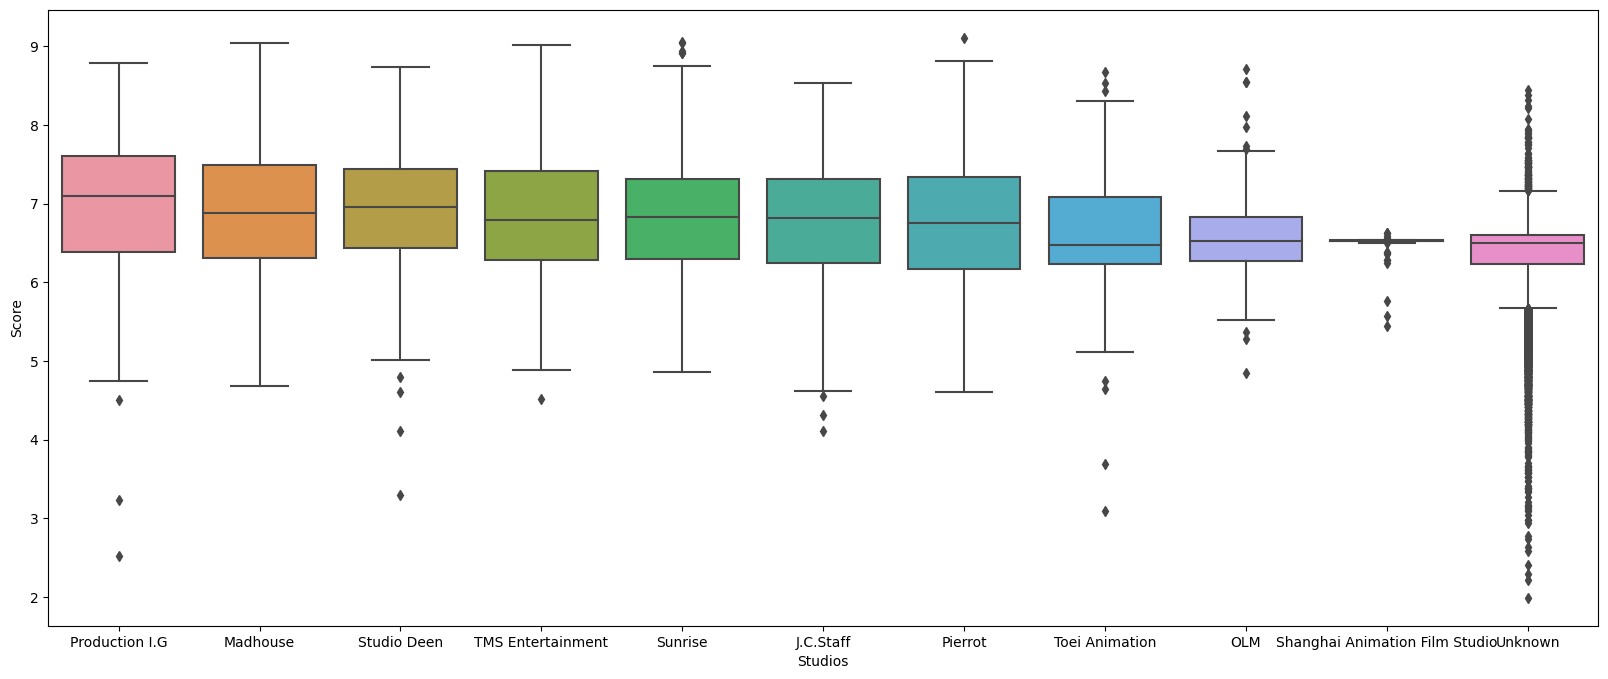

In [24]:
mean = top10.groupby(['Studios'] , as_index=False).agg({'Score' : 'mean'}).sort_values('Score' , ascending = False)
utils.box_bidi(df_copy_aux,mean,'Studios','Score')

Now that we have that auxiliar dataframe, we need to unify the studios by its name and calculate the mean,median, min and max of Score for each Studio. From the top 10 Studios.

It shows that the Studios with better mean are Production I.G, Madhouse and Studio Deen.

In [92]:
top_10_Score = utils.various(top10,'Studios','Score') # finding the mean, median, min and max of Score
top_10_Score

Score                         
                                    mean    median   min      max
Studios                                                          
Production I.G                  6.980485  7.100000  2.52  8.79000
Madhouse                        6.917399  6.880000  4.68  9.04000
Studio Deen                     6.903755  6.955000  3.30  8.74000
TMS Entertainment               6.869647  6.790000  4.52  9.02000
Sunrise                         6.832438  6.830000  4.86  9.05000
J.C.Staff                       6.756772  6.820000  4.11  8.54000
Pierrot                         6.752000  6.760000  4.60  9.11000
Toei Animation                  6.587783  6.480000  3.09  8.67000
OLM                             6.578704  6.520000  4.85  8.71000
Shanghai Animation Film Studio  6.514768  6.526434  5.45  6.62701

Now that we have that auxiliar dataframe, we need to unify the studios by its name and calculate the mean,median, min and max of Scored_by for each Studio. From the top 10 Studios.


It shows that the Studios with better mean are Shanghai Animation Film Studio, Madhouse and Pierrot.

In [64]:
top_10_Scored_by = utils.various(top10,'Studios','Scored_by') # finding the mean, median, min and max of Scored_by
top_10_Scored_by

Scored_by                       
                                         mean   median  min      max
Studios                                                             
Shanghai Animation Film Studio  155512.469136  35262.5  122   861144
Unknown                          77902.834289   3326.0    0  4128912
Madhouse                         73506.147849   6864.5  122  2520521
Pierrot                          68742.638376   4885.0  112  1811391
J.C.Staff                        62649.457711  10147.5   38  1288419
Production I.G                   49655.214706  10398.5  113  1116553
Studio Deen                      43860.411765   8708.0  112  1162643
TMS Entertainment                33958.364179   4605.0   86   928782
Sunrise                          24485.658716   2825.0  115  1298956
Toei Animation                   23860.241461   2334.0   30  1392685

We also check the coefficient of variation of Score and Scored_by. I tis possible to see those were the scores are more regular like Shanghai Animation Film Studio or OLM and those that their score are more iregular like Production I.G. or Madhouse

In [65]:
# Group a dataframe and calculate coefficient of variation
top10.groupby('Studios').apply(lambda x: np.std(x, ddof=1) / np.mean(x)).sort_values('Score' , ascending = False)

,Score,Scored_by
Studios,,
Production I.G,0.124596,2.583855
Madhouse,0.121096,3.180562
J.C.Staff,0.118023,2.320688
Pierrot,0.117720,3.198851
Studio Deen,0.107735,2.574662
TMS Entertainment,0.107275,2.665198
Sunrise,0.105539,3.919097
Toei Animation,0.101398,3.927580
Unknown,0.094762,4.125380


Taking into account this results, this are the possible ways to go for.

- 1. If the goal is to reach as many people as possible ,eventhough we might have iregular score, the best three studios to go for are: Shanghai Animation Film Studio, Madhouse and Pierrot.
- 2. If the goal is about the score there are two options:
        - Not Having the best score but the most regular one, the best three studios to go for are: Shanghai Animation Film Studio, OLM and Toei Animation.
        - Having the best score but not regular, the best three studios to go for are: Production I.G, Madhouse and Studio Deen.

# Conclusions

**From Categorical One Dimensional-Analysis**
- 75 % of the animes has 13 episodes.

- Most animes has a duration between 5 and 25 minutes

- Most of the animes get a score between 5 to 8

- Number 1 anime Fullmetal Alchemist: Brotherhood

- 2016 was the year that the most anime were released . This was followed by 2017

**From Categorical One Dimensional-Analysis**
- Most of the anime are TV type (regular series)

- Most of the anime comes from an original idea (where anime companies write up the plot and design the characters themselves)

- PG-13 - Teens 13 or older is the most popular

- Comedy Genre is the most typical

- Music, School and history theme are the ones with more animes.

- NHK, Nippon Hoso Kyokai (Japan Broadcasting Corporation), is the producer with the most anime in the world

- Toei Animation is the first private company with the most anime in the world

**From Bi-dimensional Analysis**
- **Most valued Types by users:** Taking into account this results, this are the possible ways to go for.

    - 1. If the goal is to reach as many people as possible ,eventhough we might have iregular score, the best three Types to go for are: TV, ONA and Movie.

    - 2. If the goal is about the score there are two options:
            - Not Having the best score but the most regular one, the best three Types to go for are: TV, Special and Music.
            - Having the best score but not regular, the best three Types to go for are: TV, Movie and Specials.

        Howerver, taking also into account the results of the unidimensional analysis of Types:
        - Specias and Music types has less animes then the rest.
        - TV, Movie and OVA has mores animes then the rest
        - ONA is increasing rapidly thanks to the online distribution companies like Netflix.
        Go fot TV, Movie and ONA would be the best idea

- **Best source to create an anime:** Taking into account this results, this are the possible ways to go for.

    - 1. If the goal is to reach as many people as possible ,eventhough we might have iregular score, the best three Sources to go for are: Light novel, Radio and Original.

    - 2. If the goal is about the score there are two options:
            - Not Having the best score but the most regular one, the best three Sources to go for are: Web novel, Picture book and Book.
            - Having the best score but not regular, the best three Sources to go for are: Light novel, Manga and Novel.
            
        Howerver, taking also into account the results of the unidimensional analysis of Sources:
        - Picture book, Book, Radio and Web novel has almost no animes. It would be risky to go for this ones.
        - The best idea would be to go for Light novel, Manga and Original Sources

- **Usual Number of episodes:** Seems that the higher concentration of highger scores are between 12 and 25 episodes

- **Correlation between Score and of number of episodes:** 
    - <ins>Correlation test:</ins> Results of the test showed there was a positive, very weak correlation between the two variables . 
    - <ins>Dependency relationship test:</ins> P-Value is 0, it indicates that there is no association between the two variables.
    - <ins>Conclusion:</ins> We reject the null hyphotesis but We cannot reject the alternative hyphotesis The two samples are independent. 
    - <ins>Observations:</ins> We can say that as the number of episodes increases, it does not mean that it will have a higher value. So the number of episodes does not influence. Or it does not mean by having many chapters , it will have better valuation.
    Seems that the higher concentration of higher scores are between 12 and 25 episodes

- **Correlation between Score and Duration of the episodes:** 
    - <ins>Correlation test:</ins> Results of the test showed there was a positive, weak correlation between the two variables . 
    - <ins>Dependency relationship test:</ins> P-Value is 0, it indicates that there is no association between the two variables.
    - <ins>Conclusion:</ins> We reject the null hyphotesis but We cannot reject the alternative hyphotesis The two samples are independent. 
    - <ins>Observations:</ins> We can say that as the Duration of the episodes increases, it does not mean that it will have a higher value. So the Duration of the episodes does not influence. Or it does not mean by having more duration , it will have better valuation. 

- **Best Rating to focus:** Taking into account this results, this are the possible ways to go for.

    - 1. If the goal is to reach as many people as possible ,eventhough we might have iregular score, the best three Themes to go for are: PG - Children, R - 17+ (violence & profanity) and G - All Ages.

    - 2. If the goal is about the score there are two options:
            - Not Having the best score but the most regular one, the best three Themes to go for are: PG - Children or G - All Ages.
            - Having the best score but not regular, the best three Themes to go for are: R - 17+ (violence & profanity), PG-13 - Teens 13 or older and PG - Children.

- **Best Genres to use in an anime:** Taking into account this results, this are the possible ways to go for.

    - 1. If the goal is to reach as many people as possible ,eventhough we might have iregular score, the best three Themes to go for are: Supernatural, Fantasy and Romance.

    - 2. If the goal is about the score there are two options:
            - Not Having the best score but the most regular one, the best three Themes to go for are: Slice of Life, Sci-Fi or Romance.
            - Having the best score but not regular, the best three Themes to go for are: Romance, Sci-Fi and Drama.

- **Best themes to use in an anime:** Taking into account this results, this are the possible ways to go for.

    - 1. If the goal is to reach as many people as possible ,eventhough we might have iregular score, the best three Themes to go for are: Anthropomorphic, School and Super Power.

    - 2. If the goal is about the score there are two options:
            - Not Having the best score but the most regular one, the best three Themes to go for are: Mecha, Mythology and Music.
            - Having the best score but not regular, the best three Themes to go for are: Mecha, Military and Super Power.

- **Best producers to hire:** Taking into account this results, this are the possible ways to go for.

    - 1. If the goal is to reach as many people as possible ,eventhough we might have iregular score, the best threestudios to go for are: Dentsu, Movic and Aniplex.

    - 2. If the goal is about the score,the best three studios to go for are: Bandai Visual, Fuji TV and TV Tokyo. This three has the best score and also happen to have the more regular scores.

- **Best studios to hire:** It will depend of the goal. Taking into account this results, this are the possible ways to go for.
    - 1. If the goal is to reach as many people as possible ,eventhough we might have iregular score, the best three studios to go for are: Shanghai Animation Film Studio, Madhouse and Pierrot.

    - 2. If the goal is about the score there are two options:
            - Not Having the best score but the most regular one, the best three studios to go for are: Shanghai Animation Film Studio, OLM and Toei Animation.
            - Having the best score but not regular, the best three studios to go for are: Production I.G, Madhouse and Studio Deen.

# References 

- [MyAnimeList.net](https://myanimelist.net/)
- [from Data to Viz](https://www.data-to-viz.com/#connectedscatter)
- [Seaborn Documentation](https://seaborn.pydata.org/)
- [Matplotlib Documentation](https://matplotlib.org/)
- [Data Visualization con pandas y seaborn](https://medium.com/ironhack/data-visualization-con-pandas-y-seaborn-1044906af34f)
- [The Python Graph Gallery](https://www.python-graph-gallery.com/)
- [Stack Overflow](https://stackoverflow.com/)
- [codificandobits](https://www.codificandobits.com/blog/analisis-exploratorio-de-datos/)
- [Towards data science](https://towardsdatascience.com/beautifying-the-messy-plots-in-python-solving-common-issues-in-seaborn-7372e6479fb)
- [pandas documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.explode.html)